### 1. Clean raw answers

In [1]:
# List of CSV files representing different tasks
csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv',
    './angle_results.csv',
    './area_results.csv',
    './volume_results.csv',
    './curvature_results.csv',
    './shading_results.csv'
]

In [2]:
import pandas as pd
import numpy as np
import os
import re

def clean_raw_answers(file_path):
    """
    Clean raw answers from CSV file, focusing only on extracting digits.
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: DataFrame with raw and cleaned answers
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    def extract_digits(x):
        if pd.isna(x):
            return np.nan
            
        # Convert to string and clean
        x = str(x).strip().replace('\n', '')
        
        # If string starts with "user", extract the last number
        if x.startswith('user'):
            numbers = re.findall(r'\d+\.?\d*', x)
            return float(numbers[-1]) if numbers else np.nan
            
        # Extract the first number found otherwise
        numbers = re.findall(r'\d+\.?\d*', x)
        return float(numbers[0]) if numbers else np.nan
    
    # Create new column with cleaned values
    df['parsed_answers'] = df['raw_answers'].apply(extract_digits)

    # Print row count before dropping NaN values
    print(f"Row count before dropping NaN for {len(df)}")
    
    # Drop rows with NaN in 'parsed_answers'
    df = df.dropna(subset=['parsed_answers'])

    # Format cleaned values as strings with one decimal point
    df['parsed_answers'] = df['parsed_answers'].apply(lambda x: '{:.1f}'.format(x) if not pd.isna(x) else x)

    # Print to confirm 'parsed_answers' was added and return updated DataFrame
    if 'parsed_answers' in df.columns:
        print(f"'parsed_answers' column successfully added:\n{df[['ground_truth', 'parsed_answers', 'raw_answers', 'model_name']].head()}")
    else:
        print("Error: 'parsed_answers' column not added.")
    
    return df


# Dictionary to store cleaned DataFrames by task name
cleaned_dataframes = {}

for file_path in csv_files:
    try:
        cleaned_df = clean_raw_answers(file_path)
        # Use filename (without "_results.csv") as the dictionary key
        filename = os.path.basename(file_path).replace("_results.csv", "")
        cleaned_dataframes[filename] = cleaned_df  # Store cleaned DataFrame by task name
        
        # Print the cleaned DataFrame for verification
        print(f"\nCleaned DataFrame for task '{filename}':")
        print(cleaned_df[['image_path', 'ground_truth', 'parsed_answers', 'raw_answers', 'model_name']])
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


df_volume = cleaned_dataframes.get('volume')
df_area = cleaned_dataframes.get('area')
df_direction = cleaned_dataframes.get('direction')
df_length = cleaned_dataframes.get('length')
df_position_common_scale = cleaned_dataframes.get('position_common_scale')
df_position_non_aligned_scale = cleaned_dataframes.get('position_non_aligned_scale')
df_angle = cleaned_dataframes.get('angle')
df_curvature = cleaned_dataframes.get('curvature')
df_shading = cleaned_dataframes.get('shading')


Row count before dropping NaN for 305
'parsed_answers' column successfully added:
   ground_truth parsed_answers raw_answers model_name
0         104.0          135.0         135      gpt4o
1         212.0           45.0          45      gpt4o
2         215.0           50.0          50      gpt4o
3          68.0           35.0          35      gpt4o
4          70.0           40.0          40      gpt4o

Cleaned DataFrame for task 'direction':
                                        image_path  ground_truth  \
0     EXP1-Results/direction/direction_image_1.png         104.0   
1     EXP1-Results/direction/direction_image_2.png         212.0   
2     EXP1-Results/direction/direction_image_3.png         215.0   
3     EXP1-Results/direction/direction_image_4.png          68.0   
4     EXP1-Results/direction/direction_image_5.png          70.0   
..                                             ...           ...   
299  EXP1-Results/direction/direction_image_16.png         259.0   
300  EXP1

In [3]:
df_volume[['ground_truth', 'parsed_answers', 'raw_answers', 'model_name']]

,ground_truth,parsed_answers,raw_answers,model_name
0,27.0,1.0,1,gpt4o
1,2744.0,1.0,1,gpt4o
2,64.0,1.0,1,gpt4o
3,1.0,1.0,1,gpt4o
4,1000.0,64.0,64,gpt4o
...,...,...,...,...
299,1331.0,125.0,125 \n,Gemini1_5Flash
300,1728.0,27.0,27 \n,Gemini1_5Flash
301,1331.0,64.0,64\n,Gemini1_5Flash
302,729.0,1000.0,1000 \n,Gemini1_5Flash


/tmp/ipykernel_3567472/2427124298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_custom_llama['parsed_answers'] = pd.to_numeric(df_custom_llama['parsed_answers'], errors='coerce')
/tmp/ipykernel_3567472/2427124298.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_custom_llama['ground_truth'] = pd.to_numeric(df_custom_llama['ground_truth'], errors='coerce')


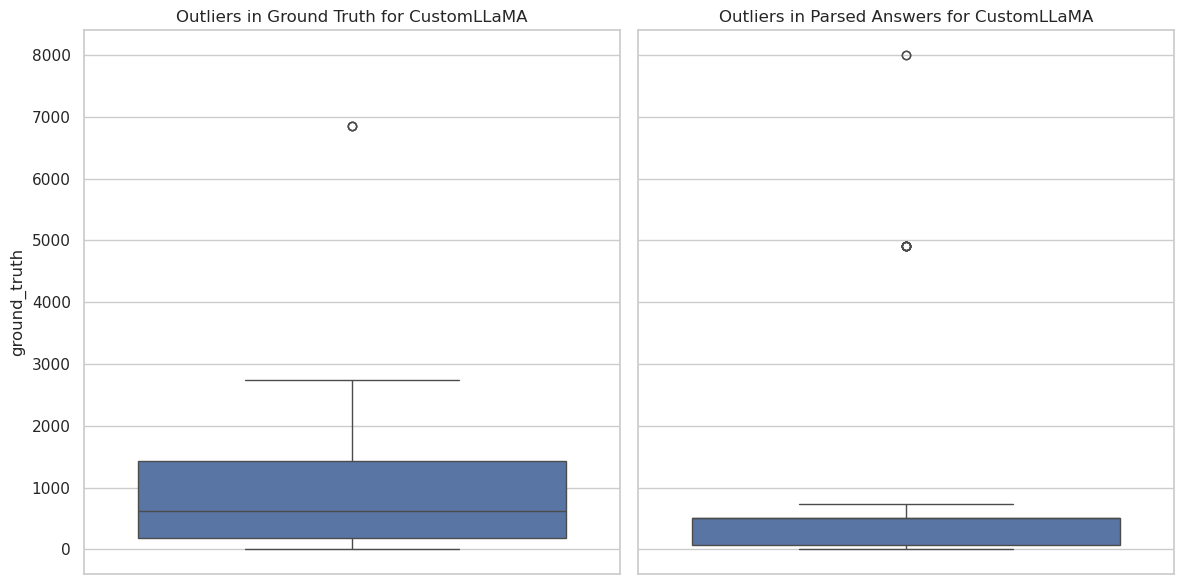

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for only the CustomLLaMA model
df_custom_llama = df_volume[df_volume['model_name'] == 'CustomLLaMA']

# Ensure numeric conversion in case it hasn’t been done yet
df_custom_llama['parsed_answers'] = pd.to_numeric(df_custom_llama['parsed_answers'], errors='coerce')
df_custom_llama['ground_truth'] = pd.to_numeric(df_custom_llama['ground_truth'], errors='coerce')

# Set up the plot style
sns.set(style="whitegrid")

# Create a subplot to compare 'ground_truth' and 'parsed_answers' outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Box plot for 'ground_truth' values for CustomLLaMA
sns.boxplot(y='ground_truth', data=df_custom_llama, ax=axes[0])
axes[0].set_title('Outliers in Ground Truth for CustomLLaMA')

# Box plot for 'parsed_answers' values for CustomLLaMA
sns.boxplot(y='parsed_answers', data=df_custom_llama, ax=axes[1])
axes[1].set_title('Outliers in Parsed Answers for CustomLLaMA')

# Show plot
plt.tight_layout()
plt.show()


In [32]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 303
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          300 non-null    object 
 1   run                 300 non-null    object 
 2   image_path          300 non-null    object 
 3   ground_truth        300 non-null    float64
 4   raw_answers         300 non-null    object 
 5   forced_repetitions  300 non-null    float64
 6   time_ms             300 non-null    float64
 7   parsed_answers      300 non-null    object 
dtypes: float64(3), object(5)
memory usage: 21.1+ KB


### 2. Check dataframe if parsed answers match with raw answers

In [3]:
# Set display options to show all rows and all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Set to None to display full cell content

print("Direction dataframe after na value", len(df_direction))

df_direction.head()


Direction dataframe after na value 300


,model_name,run,image_path,ground_truth,raw_answers,forced_repetitions,time_ms,parsed_answers
0,gpt4o,run_0,EXP1-Results/direction/direction_image_1.png,104.0,135,0.0,6023.793697,135.0
1,gpt4o,run_0,EXP1-Results/direction/direction_image_2.png,212.0,45,0.0,5766.133070,45.0
2,gpt4o,run_0,EXP1-Results/direction/direction_image_3.png,215.0,50,0.0,5953.326941,50.0
3,gpt4o,run_0,EXP1-Results/direction/direction_image_4.png,68.0,35,0.0,6007.609367,35.0
4,gpt4o,run_0,EXP1-Results/direction/direction_image_5.png,70.0,40,0.0,6732.647181,40.0


### 3. Validate_parsed_answers = raw_answers

In [4]:
def validate_parsed_answers(df):
    """
    Validate the parsed_answers column by re-applying the extraction logic
    and comparing with parsed_answers.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with raw_answers and parsed_answers
    
    Returns:
    pandas.DataFrame: DataFrame with validation results
    """
    
    def expected_parsed_answer(raw):
        if pd.isna(raw):
            return np.nan
            
        raw = str(raw).strip().replace('\n', '')
        
        # If string starts with "user", extract the last number
        if raw.startswith('user'):
            numbers = re.findall(r'\d+\.?\d*', raw)
            return float(numbers[-1]) if numbers else np.nan
        
        # Extract first number found
        numbers = re.findall(r'\d+\.?\d*', raw)
        return float(numbers[0]) if numbers else np.nan

    # Apply the validation logic to create an expected column
    df['expected_parsed'] = df['raw_answers'].apply(expected_parsed_answer)
    
    # Compare parsed_answers with expected_parsed
    df['is_correct'] = df['parsed_answers'].astype(float) == df['expected_parsed']
    
    # Filter mismatches for easy review
    mismatches = df[df['is_correct'] == False]
    
    # Display mismatches for manual review
    if not mismatches.empty:
        print("Mismatches found:")
        print(mismatches[['raw_answers', 'parsed_answers', 'expected_parsed']])
    else:
        print("All parsed answers match the expected values.")
        
    return mismatches

# Example usage on a DataFrame, e.g., df_direction
mismatches = validate_parsed_answers(df_direction)


All parsed answers match the expected values.


### 4. Display all 9 images tasks

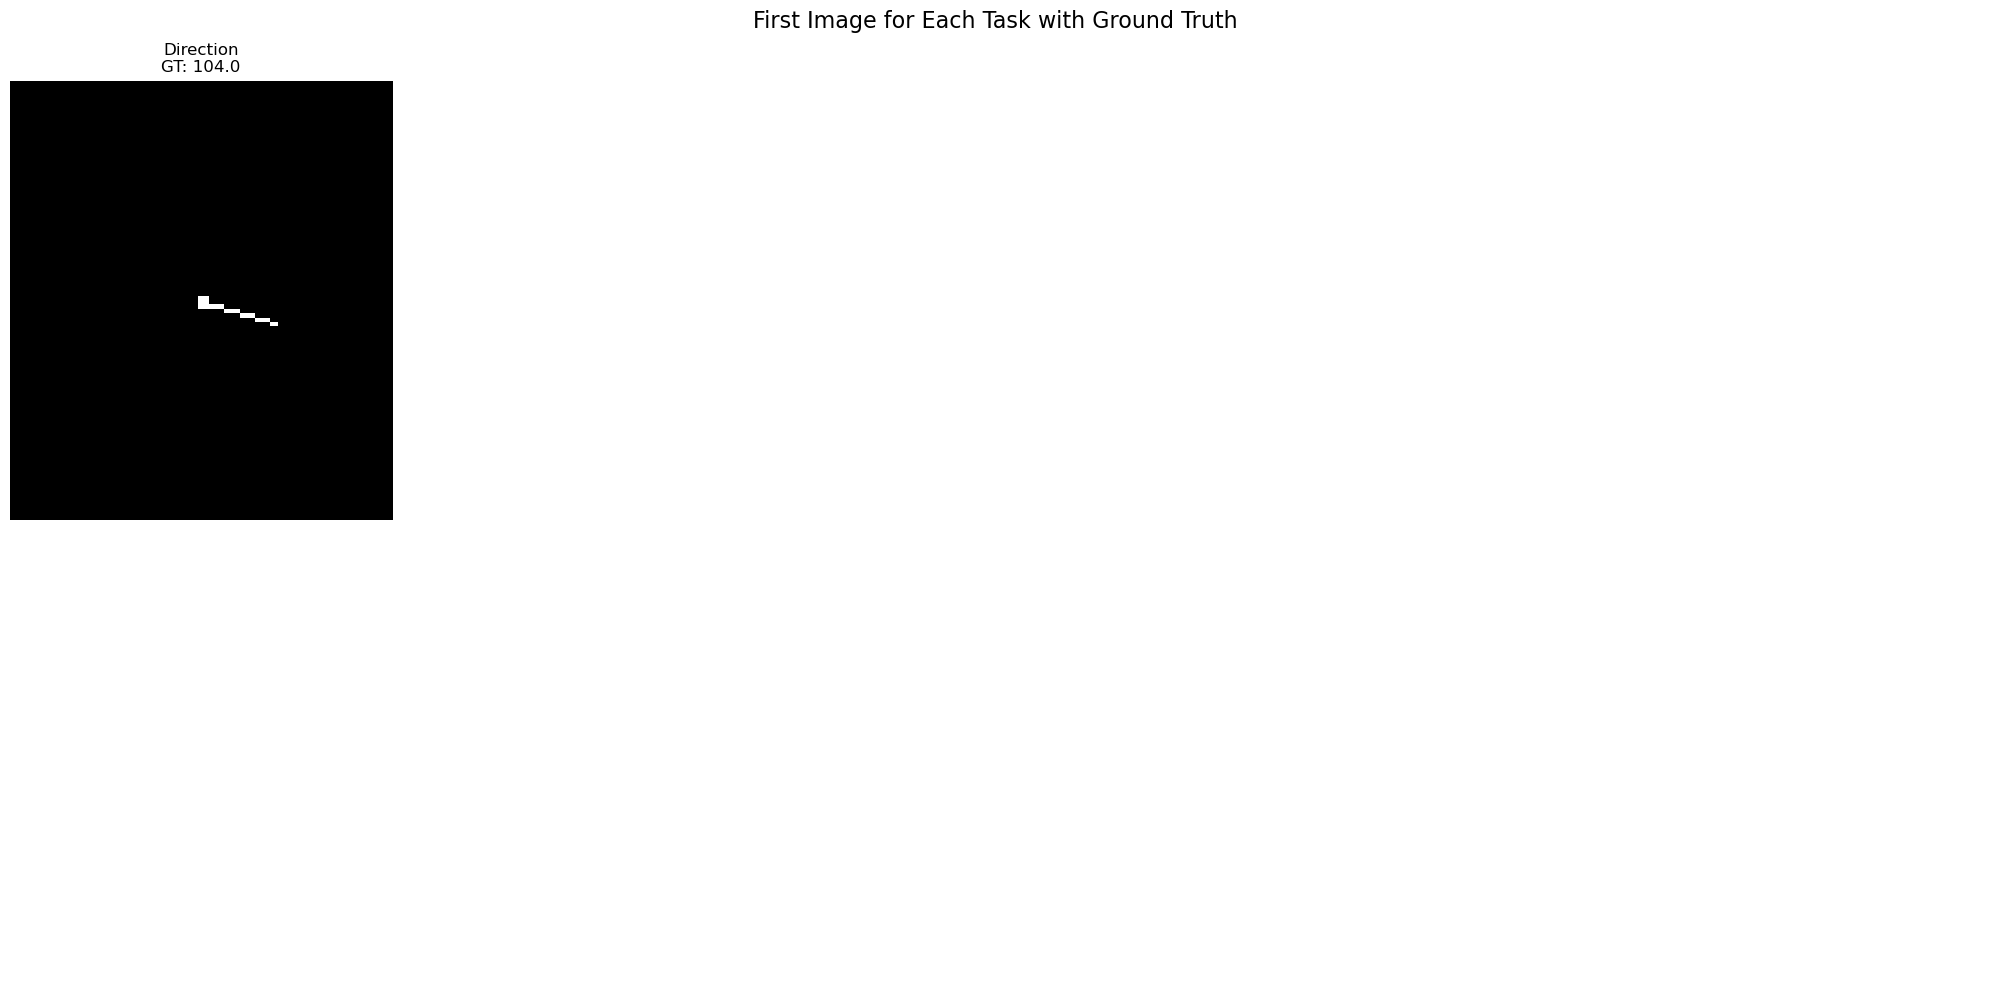

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "."

# Define a dictionary of all tasks and their CSV file paths
all_tasks = {
    "direction": './direction_results.csv',
    "length": './length_results.csv',
    "position_common_scale": './position_common_scale_results.csv',
    "position_non_aligned_scale": './position_non_aligned_scale_results.csv',
    "angle": './angle_results.csv',
    "area": './area_results.csv',
    "volume": './volume_results.csv',
    "curvature": './curvature_results.csv',
    "shading": './shading_results.csv'
}

def display_first_image_for_tasks(tasks="all"):
    """
    Displays the first image for specified tasks or for all tasks.
    
    Parameters:
    - tasks: List of task names to display (e.g., ["direction", "area"]) or "all" to display all tasks.
    """
    # Determine which CSV files to load based on the tasks parameter
    if tasks == "all":
        csv_files = all_tasks.values()
    else:
        csv_files = [all_tasks[task] for task in tasks if task in all_tasks]

    # Set the layout for plotting
    num_cols = 5
    num_rows = 2

    # Create a figure with subplots for displaying images in a 2-row grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    fig.suptitle("First Image for Each Task with Ground Truth", fontsize=16)

    # Flatten axes for easy iteration if there are multiple rows
    axes = axes.flatten()

    # Loop through each CSV file to display the first image for each task
    for idx, csv_file in enumerate(csv_files):
        # Stop if there are no more axes available
        if idx >= len(axes):
            break
        
        # Check if the CSV file exists
        if not os.path.exists(csv_file):
            print(f"CSV file not found: {csv_file}")
            continue

        # Read the CSV file into a DataFrame
        results_df = pd.read_csv(csv_file)

        # Extract the task name from the CSV filename (e.g., 'angle' from 'angle_results.csv')
        task = os.path.basename(csv_file).replace('_results.csv', '')

        # Get the first row to display the first image for this task
        first_row = results_df.iloc[0]
        
        # Extract the filename only from the image path
        image_filename = os.path.basename(first_row["image_path"])  # e.g., 'angle_image_6.png'
        
        # Construct the full path to the image file
        image_path = os.path.join(base_folder, task, image_filename)
        ground_truth = first_row["ground_truth"]

        # Display the image in the subplot
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[idx].imshow(img, cmap="gray")
            axes[idx].set_title(f"{task.capitalize()}\nGT: {ground_truth}")
            axes[idx].set_xticks([])  # Remove x-axis ticks
            axes[idx].set_yticks([])  # Remove y-axis ticks
            axes[idx].set_aspect('auto')  # Scale the image to fill the subplot
        else:
            print(f"Image not found: {image_path}")
            axes[idx].set_title(f"{task.capitalize()}\nImage not found")
        
        axes[idx].axis("off")

    # Hide any remaining empty subplots
    for j in range(idx + 1, len(axes)):
        axes[j].axis("off")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


# Example usage:
# To display only "direction" and "area" tasks:
display_first_image_for_tasks(["direction"])




### 5. Caculate all metrics

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# Dictionary to store metrics for each dataset
metrics_summary = {}

dataframes = {
    'df_direction': df_direction,
    'df_length': df_length,
    'df_position_common_scale': df_position_common_scale,
    'df_position_non_aligned_scale': df_position_non_aligned_scale,
    'df_angle': df_angle,
    'df_area': df_area,
    'df_volume': df_volume,
    'df_curvature': df_curvature,
    'df_shading': df_shading
}

# Loop through each dataset
for df_name, df in dataframes.items():
    # Dictionary to store metrics for each model within the current DataFrame
    model_metrics = {}
    
    # Group by `model_name` and calculate metrics for each model within the dataset
    for model_name, data in df.groupby('model_name'):
        # Ensure `ground_truth` and `parsed_answers` columns are numeric, converting non-numeric values to NaN
        data['ground_truth'] = pd.to_numeric(data['ground_truth'], errors='coerce')
        data['parsed_answers'] = pd.to_numeric(data['parsed_answers'], errors='coerce')
        
        # Drop rows where either `ground_truth` or `parsed_answers` is NaN after conversion
        data = data.dropna(subset=['ground_truth', 'parsed_answers'])
        
        # Calculate Mean and Standard Deviation of `parsed_answers`
        mean_parsed_answers = data['parsed_answers'].mean()
        std_parsed_answers = data['parsed_answers'].std()
        
        # Calculate Mean Squared Error (MSE)
        data['mse'] = (data['ground_truth'] - data['parsed_answers']) ** 2
        avg_mse = data['mse'].mean()
        
        # Calculate Mean Log Absolute Error (MLAE)
        data['mlae'] = data.apply(
            lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125),
            axis=1
        )
        
        # Calculate average MLAE and standard deviation of MLAE
        avg_mlae = data['mlae'].mean()
        std_mlae = data['mlae'].std()
        
        # Bootstrap confidence interval for MLAE
        mlae_values = data['mlae'].dropna().values  # Drop NaN values, if any
        bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
        confidence_value = 1.96 * bootstrap_result.value  # 95% confidence interval margin for std (using 1.96 Z-score)

        # Store metrics in the model_metrics dictionary
        model_metrics[model_name] = {
            'Dataset': df_name,
            'Model': model_name,
            #'Mean Parsed Answers': round(mean_parsed_answers, 2),
            #'Std Parsed Answers': round(std_parsed_answers, 2),
            #'Average MSE': round(avg_mse, 2),
            'Average MLAE': round(avg_mlae, 2),
            'Std MLAE': round(std_mlae, 2),
            'Confidence Interval (95%)': round(confidence_value, 2)
        }
    
    # Store model metrics for the current dataset
    metrics_summary[df_name] = model_metrics

# Convert the nested metrics_summary dictionary to a DataFrame for easy viewing
metrics_table = pd.DataFrame([
    metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
])

# Display the resulting table
metrics_table


,Dataset,Model,Average MLAE,Std MLAE,Confidence Interval (95%)
0,df_direction,CustomLLaMA,2.02,1.18,2.30
1,df_direction,Gemini1_5Flash,6.15,1.33,2.58
2,df_direction,GeminiProVision,6.46,1.45,2.81
3,df_direction,LLaMA,6.10,1.41,2.75
4,df_direction,gpt4o,5.99,1.70,3.31
5,df_length,CustomLLaMA,-0.14,1.83,3.56
6,df_length,Gemini1_5Flash,4.62,1.31,2.55
7,df_length,GeminiProVision,5.61,0.59,1.15
8,df_length,LLaMA,4.55,1.92,3.72
9,df_length,gpt4o,2.74,1.97,3.83


In [15]:
pwd

'/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results'

### 6. Plot MLAE for all models


Row count before dropping NaN: 305
'parsed_answers' column successfully added for ./volume_results.csv

Cleaned DataFrame for task 'volume':
                               image_path  ground_truth parsed_answers  \
0  EXP1-Results/volume/volume_image_1.png          27.0            1.0   
1  EXP1-Results/volume/volume_image_2.png        2744.0            1.0   
2  EXP1-Results/volume/volume_image_3.png          64.0            1.0   
3  EXP1-Results/volume/volume_image_4.png           1.0            1.0   
4  EXP1-Results/volume/volume_image_5.png        1000.0           64.0   

  raw_answers model_name  
0           1      gpt4o  
1           1      gpt4o  
2           1      gpt4o  
3           1      gpt4o  
4          64      gpt4o  
Row count before dropping NaN: 305
'parsed_answers' column successfully added for ./area_results.csv

Cleaned DataFrame for task 'area':
                           image_path  ground_truth parsed_answers  \
0  EXP1-Results/area/area_image_1.png    615.

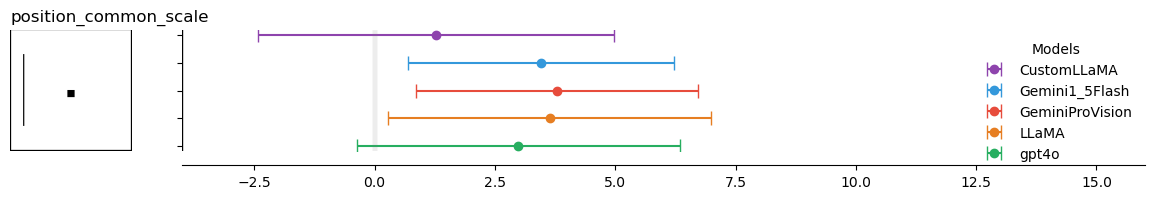

In [4]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def clean_raw_answers(file_path):
    """
    Clean raw answers from CSV file, focusing only on extracting digits.
    """
    df = pd.read_csv(file_path)
    
    def extract_digits(x):
        if pd.isna(x):
            return np.nan
        x = str(x).strip().replace('\n', '')
        if x.startswith('user'):
            numbers = re.findall(r'\d+\.?\d*', x)
            return float(numbers[-1]) if numbers else np.nan
        numbers = re.findall(r'\d+\.?\d*', x)
        return float(numbers[0]) if numbers else np.nan
    
    df['parsed_answers'] = df['raw_answers'].apply(extract_digits)
    print(f"Row count before dropping NaN: {len(df)}")
    df = df.dropna(subset=['parsed_answers'])
    df['parsed_answers'] = df['parsed_answers'].apply(lambda x: '{:.1f}'.format(x) if not pd.isna(x) else x)

    if 'parsed_answers' in df.columns:
        print(f"'parsed_answers' column successfully added for {file_path}")
    else:
        print("Error: 'parsed_answers' column not added.")
    
    return df

# Initialize cleaned dataframes
cleaned_dataframes = {}

# Define `csv_files` as a list of paths
csv_files = [f"./{task}_results.csv" for task in [
    'volume', 'area', 'direction', 'length', 'position_common_scale', 
    'position_non_aligned_scale', 'angle', 'curvature', 'shading']]

for file_path in csv_files:
    try:
        cleaned_df = clean_raw_answers(file_path)
        task_name = os.path.basename(file_path).replace("_results.csv", "")
        cleaned_dataframes[task_name] = cleaned_df
        print(f"\nCleaned DataFrame for task '{task_name}':")
        print(cleaned_df[['image_path', 'ground_truth', 'parsed_answers', 'raw_answers', 'model_name']].head())
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Populate `dataframes` dictionary dynamically from `cleaned_dataframes`
dataframes = {f"df_{task}": df for task, df in cleaned_dataframes.items()}

# Calculate metrics for each dataset
metrics_summary = {}
for df_name, df in dataframes.items():
    model_metrics = {}
    for model_name, data in df.groupby('model_name'):
        data['ground_truth'] = pd.to_numeric(data['ground_truth'], errors='coerce')
        data['parsed_answers'] = pd.to_numeric(data['parsed_answers'], errors='coerce')
        data = data.dropna(subset=['ground_truth', 'parsed_answers'])
        
        # Calculate metrics
        avg_mse = ((data['ground_truth'] - data['parsed_answers']) ** 2).mean()
        data['mlae'] = data.apply(lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125), axis=1)
        avg_mlae = data['mlae'].mean()
        std_mlae = data['mlae'].std()
        mlae_values = data['mlae'].dropna().values
        bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
        confidence_value = 1.96 * bootstrap_result.value

        model_metrics[model_name] = {
            'Dataset': df_name,
            'Model': model_name,
            'Average MLAE': round(avg_mlae, 2),
            'Std MLAE': round(std_mlae, 2),
            'Confidence Interval (95%)': round(confidence_value, 2)
        }
    
    metrics_summary[df_name] = model_metrics

# Convert metrics summary to a DataFrame
metrics_table = pd.DataFrame([
    metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
])


def plot_task(task_name, metrics_table, base_dir="."):
    # Ensure the task name in `metrics_table` is matched by prefixing "df_"
    metrics_task_name = f"df_{task_name}"  # Add the "df_" prefix
    task_images = {
        'direction': os.path.join(base_dir, 'direction', 'direction_image_1.png'),
        'length': os.path.join(base_dir, 'length', 'length_image_1.png'),
        'position_common_scale': os.path.join(base_dir, 'position_common_scale', 'position_common_scale_image_1.png'),
        'position_non_aligned_scale': os.path.join(base_dir, 'position_non_aligned_scale', 'position_non_aligned_scale_image_1.png'),
        'angle': os.path.join(base_dir, 'angle', 'angle_image_1.png'),
        'area': os.path.join(base_dir, 'area', 'area_image_1.png'),
        'volume': os.path.join(base_dir, 'volume', 'volume_image_1.png'),
        'curvature': os.path.join(base_dir, 'curvature', 'curvature_image_1.png'),
        'shading': os.path.join(base_dir, 'shading', 'shading_image_1.png')
    }

    # Verify that the task exists in both `metrics_table` and `task_images`
    if metrics_task_name not in metrics_table['Dataset'].values:
        print(f"Task '{task_name}' not found in metrics_table.")
        return
    if task_name not in task_images:
        print(f"Task image for '{task_name}' not found in task_images.")
        return

    # Retrieve the data for the specified task
    task_data = metrics_table[metrics_table['Dataset'] == metrics_task_name]
    img_path = task_images[task_name]

    # Verify that the image file exists
    if not os.path.exists(img_path):
        print(f"Image for task '{task_name}' not found at {img_path}.")
        return

    # Plotting setup
    fig, (ax_img, ax_plot) = plt.subplots(1, 2, figsize=(12, 2),
                                          gridspec_kw={'width_ratios': [1, 5]}, sharex=False)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.patch.set_facecolor('white')

    # Display the task image
    try:
        img = Image.open(img_path).convert("L")
        img_inverted = ImageOps.invert(img)
        img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
        ax_img.imshow(img_with_border)
        ax_img.axis('off')
    except Exception as e:
        print(f"Error displaying image for '{task_name}': {e}")
        ax_img.text(0.5, 0.5, "Error displaying image", ha="center", va="center", fontsize=10, color="black")
        ax_img.set_facecolor("white")

    # Sort model names and plot MLAE and confidence intervals
    sorted_model_names = sorted(task_data['Model'].unique())
    y_positions = np.arange(len(sorted_model_names))
    model_colors = {
        'CustomLLaMA': '#8E44AD',       # Purple
        'Gemini1_5Flash': '#3498DB',    # Blue
        'GeminiProVision': '#E74C3C',   # Red
        'LLaMA': '#E67E22',             # Orange
        'gpt4o': '#27AE60'              # Green
    }

    # Plot MLAE values with confidence intervals
    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['Model'] == model_name]
        mlae_value = model_data['Average MLAE'].values[0]
        confidence_interval = model_data['Confidence Interval (95%)'].values[0]
        
        # Plot with color for each model
        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o', 
                         color=model_colors.get(model_name, 'gray'), capsize=5, label=model_name)

    # Set up plot without y-tick labels, and add legend
    ax_plot.axvline(-4, color="black", linewidth=1)
    ax_plot.axvline(-14, color="black", linewidth=1)
    for offset in np.linspace(-0.05, 0.05, 10):
        ax_plot.axvline(0 + offset, color="gray", alpha=0.1, linewidth=0.5)

    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['bottom'].set_position(('outward', 10))
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])  # Remove y-axis labels
    ax_plot.set_xlim(-4, 16)
    ax_plot.invert_yaxis()
    
    # Add the legend
    ax_plot.legend(loc="upper right", frameon=False, title="Models")

    ax_img.set_title(task_name, loc="left", fontsize=12, color="black")
    plt.tight_layout()
    plt.show()

# Example usage
plot_task('position_common_scale', metrics_table, base_dir=".")



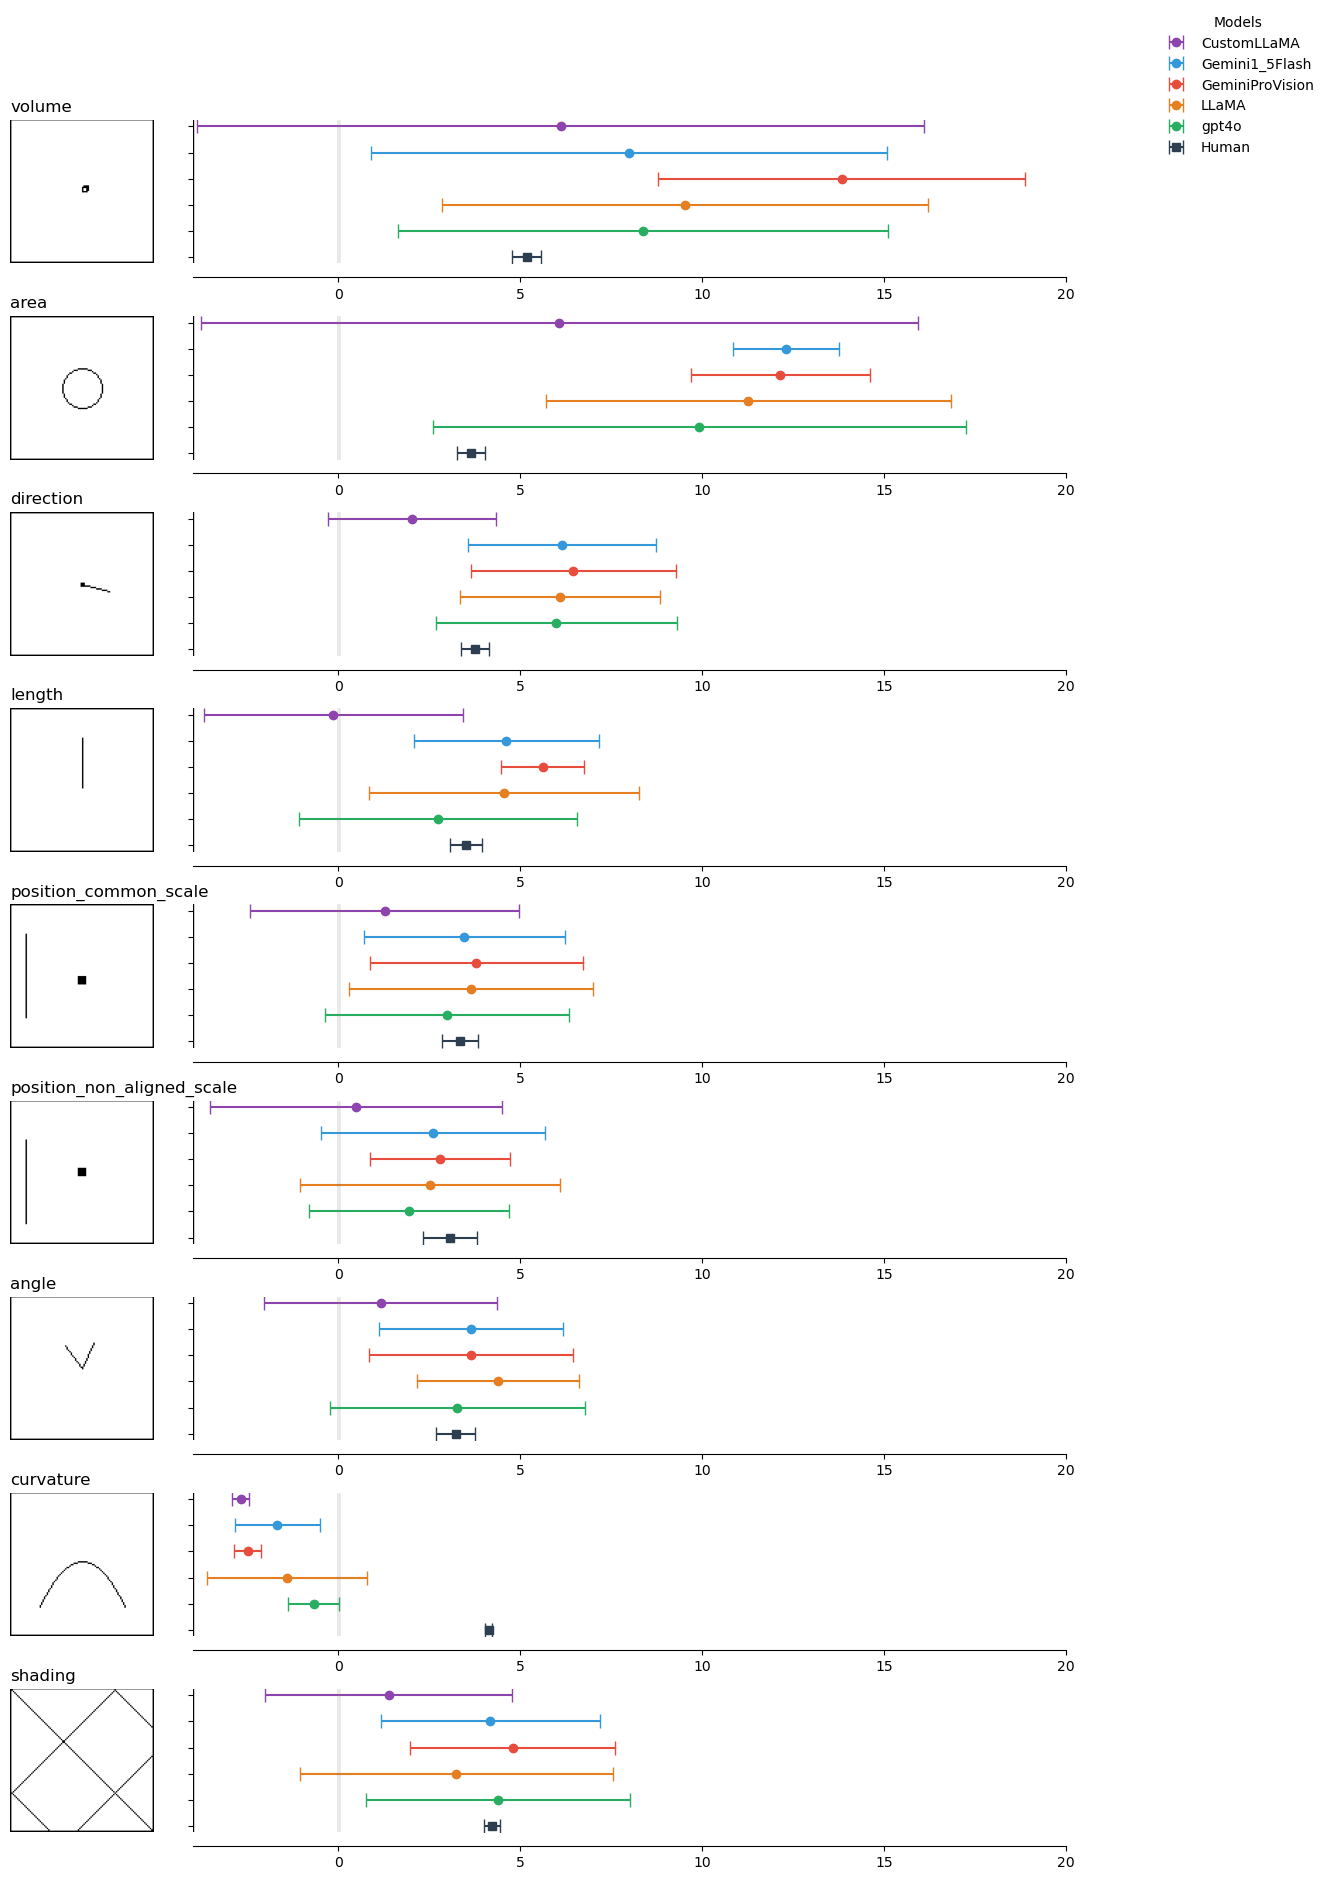

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os

# Group data by dataset for easier access
summary_stats_by_task = {df_name: metrics_table[metrics_table['Dataset'] == df_name] for df_name in metrics_table['Dataset'].unique()}

# Set the correct base directory
base_dir = "."

# Define task images relative to the base directory
task_images = {
    'direction': os.path.join(base_dir, 'direction', 'direction_image_1.png'),
    'length': os.path.join(base_dir, 'length', 'length_image_1.png'),
    'position_common_scale': os.path.join(base_dir, 'position_common_scale', 'position_common_scale_image_1.png'),
    'position_non_aligned_scale': os.path.join(base_dir, 'position_non_aligned_scale', 'position_non_aligned_scale_image_1.png'),
    'angle': os.path.join(base_dir, 'angle', 'angle_image_1.png'),
    'area': os.path.join(base_dir, 'area', 'area_image_1.png'),
    'volume': os.path.join(base_dir, 'volume', 'volume_image_1.png'),
    'curvature': os.path.join(base_dir, 'curvature', 'curvature_image_1.png'),
    'shading': os.path.join(base_dir, 'shading', 'shading_image_1.png')
}

# Define colors for each model
model_colors = {
    'CustomLLaMA': '#8E44AD',       # Purple
    'Gemini1_5Flash': '#3498DB',    # Blue
    'GeminiProVision': '#E74C3C',   # Red
    'LLaMA': '#E67E22',             # Orange
    'gpt4o': '#27AE60',             # Green
    'Human': '#2C3E50'              # Dark color for Human data points
}

# Define human data points with MLAE and error bars
human_data = {
    'angle': (3.22, 0.54),
    'area': (3.64, 0.38),
    'volume': (5.18, 0.40),
    'curvature': (4.13, 0.10),
    'shading': (4.22, 0.23),
    'position_common_scale': (3.35, 0.49),
    'position_non_aligned_scale': (3.06, 0.74),
    'length': (3.51, 0.44),
    'direction': (3.75, 0.39)
}

# Plot configuration
num_tasks = len(summary_stats_by_task)
fig, axes = plt.subplots(num_tasks, 3, figsize=(13, 2 * num_tasks), 
                         gridspec_kw={'width_ratios': [1, 5, 1]}, sharex=False)

# Adjust layout to make space for the legend on the right
fig.subplots_adjust(hspace=0.5, wspace=0.3, left=0.05, right=0.85, top=0.95, bottom=0.05)
fig.patch.set_facecolor('white')

# Convert `axes` to 2D array if only one row of subplots
if num_tasks == 1:
    axes = axes.reshape(1, -1)

# Loop through each task (dataset) and its summary stats
for i, (task_name, task_data) in enumerate(summary_stats_by_task.items()):
    ax_img, ax_plot, ax_label = axes[i]

    # Clean task name to match keys in `task_images`
    cleaned_task_name = task_name.replace("df_", "")
    
    # Use the cleaned name to access the correct image path
    img_path = task_images.get(cleaned_task_name)
    
    # Display task image if available
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert("L")
            img_inverted = ImageOps.invert(img)
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            ax_img.imshow(img_with_border)
            ax_img.axis('off')  # Hide axes for the image plot

        except Exception as e:
            ax_img.text(0.5, 0.5, "Error displaying image", ha="center", va="center", fontsize=10, color="black")
            ax_img.set_facecolor("white")
    else:
        ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=10, color="black")
        ax_img.set_facecolor("white")

    # Sort model names alphabetically and get y positions
    sorted_model_names = sorted(task_data['Model'].unique())
    y_positions = np.arange(len(sorted_model_names) + 1)  # +1 for the human data point

    # Plot MLAE and error bars in the middle
    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['Model'] == model_name]
        mlae_value = model_data['Average MLAE'].values[0]
        confidence_interval = model_data['Confidence Interval (95%)'].values[0]

        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o', 
                         color=model_colors.get(model_name, 'gray'), capsize=5, 
                         label=model_name if i == 0 else None)  # Add label only for the first task for the legend

    # Add the human data point if it exists for the task
    if cleaned_task_name in human_data:
        human_mlae, human_error = human_data[cleaned_task_name]
        ax_plot.errorbar(human_mlae, len(sorted_model_names), xerr=human_error, fmt='s', 
                         color=model_colors['Human'], capsize=5, label="Human" if i == 0 else None)

    # Add reference lines
    ax_plot.axvline(-4, color="black", linewidth=1)
    ax_plot.axvline(-14, color="black", linewidth=1)
    
    # Add blurred line at 0
    for offset in np.linspace(-0.05, 0.05, 10):
        ax_plot.axvline(0 + offset, color="gray", alpha=0.1, linewidth=0.5)

    # Customize plot appearance
    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['bottom'].set_position(('outward', 10))

    # Set axis properties
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])  # Remove y-axis labels from `ax_plot`
    ax_plot.set_xlim(-4, 20)
    ax_plot.invert_yaxis()

    # Set the title on `ax_img` to display the task name
    ax_img.set_title(cleaned_task_name, loc="left", fontsize=12, color="black")

    # Configure the right labels on `ax_label`
    y_tick_labels = sorted_model_names + ['Human']  # Include 'Human' as the last label
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels(y_tick_labels, fontsize=10)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)  # Show labels on the right
    ax_label.set_ylim(ax_plot.get_ylim())
    ax_label.axis("off")  # Hide the axis frame for `ax_label`

# Add a legend to the right of the entire figure
# We use bbox_to_anchor to place the legend outside the plotting area
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', title="Models", frameon=False, bbox_to_anchor=(0.9, 1))

# Ensure tight layout
plt.tight_layout()
plt.show()


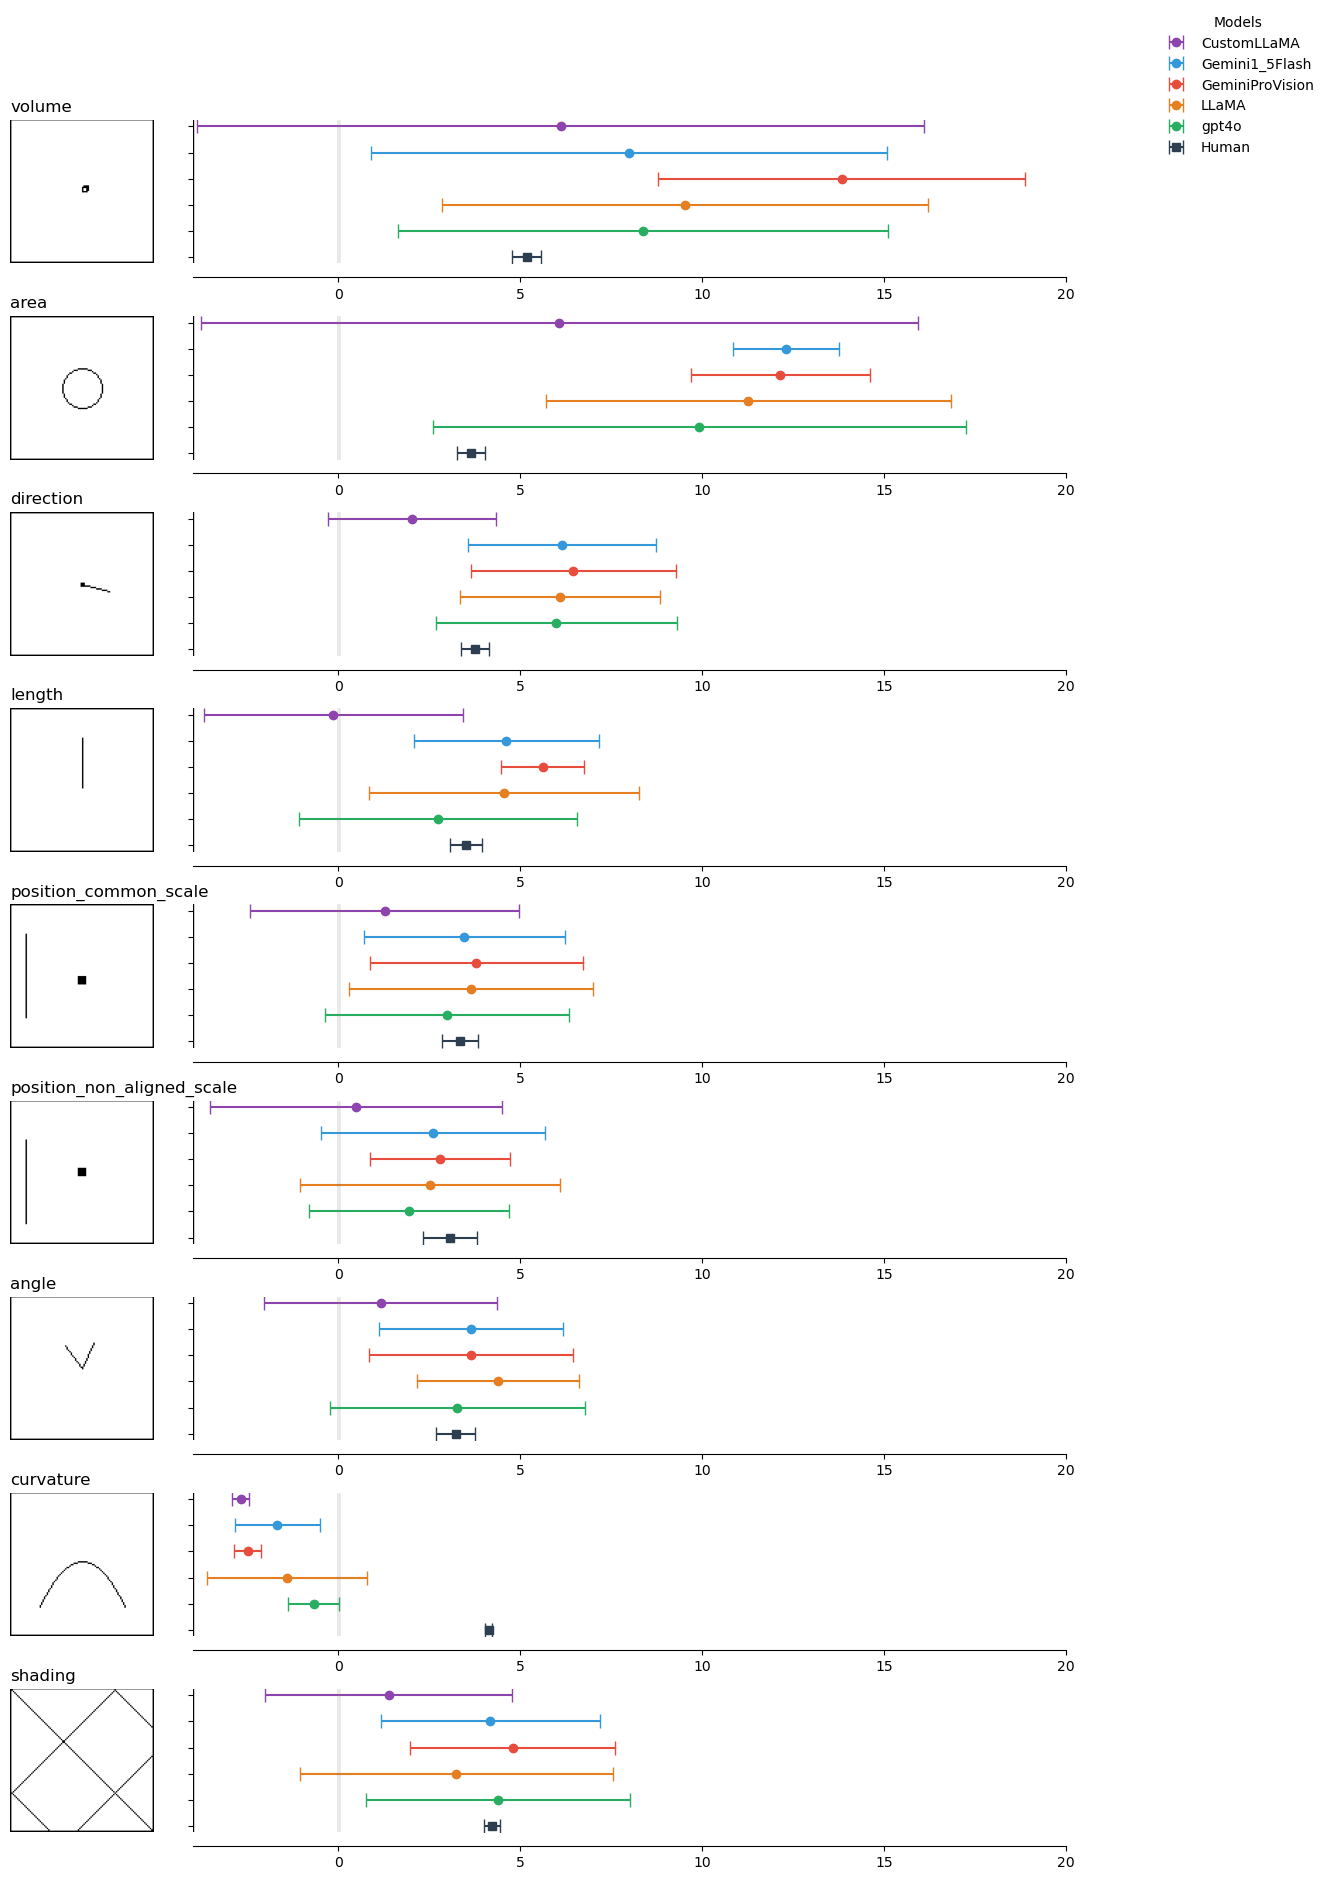

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os

# Group data by dataset for easier access
summary_stats_by_task = {df_name: metrics_table[metrics_table['Dataset'] == df_name] for df_name in metrics_table['Dataset'].unique()}

# Set the correct base directory
base_dir = "."

# Define task images relative to the base directory
task_images = {
    'direction': os.path.join(base_dir, 'direction', 'direction_image_1.png'),
    'length': os.path.join(base_dir, 'length', 'length_image_1.png'),
    'position_common_scale': os.path.join(base_dir, 'position_common_scale', 'position_common_scale_image_1.png'),
    'position_non_aligned_scale': os.path.join(base_dir, 'position_non_aligned_scale', 'position_non_aligned_scale_image_1.png'),
    'angle': os.path.join(base_dir, 'angle', 'angle_image_1.png'),
    'area': os.path.join(base_dir, 'area', 'area_image_1.png'),
    'volume': os.path.join(base_dir, 'volume', 'volume_image_1.png'),
    'curvature': os.path.join(base_dir, 'curvature', 'curvature_image_1.png'),
    'shading': os.path.join(base_dir, 'shading', 'shading_image_1.png')
}

# Define colors for each model
model_colors = {
    'CustomLLaMA': '#8E44AD',       # Purple
    'Gemini1_5Flash': '#3498DB',    # Blue
    'GeminiProVision': '#E74C3C',   # Red
    'LLaMA': '#E67E22',             # Orange
    'gpt4o': '#27AE60',             # Green
    'Human': '#2C3E50'              # Dark color for Human data points
}

# Define human data points with MLAE and error bars
human_data = {
    'angle': (3.22, 0.54),
    'area': (3.64, 0.38),
    'volume': (5.18, 0.40),
    'curvature': (4.13, 0.10),
    'shading': (4.22, 0.23),
    'position_common_scale': (3.35, 0.49),
    'position_non_aligned_scale': (3.06, 0.74),
    'length': (3.51, 0.44),
    'direction': (3.75, 0.39)
}

# Plot configuration
num_tasks = len(summary_stats_by_task)
fig, axes = plt.subplots(num_tasks, 3, figsize=(13, 2 * num_tasks), 
                         gridspec_kw={'width_ratios': [1, 5, 1]}, sharex=False)

# Adjust layout to make space for the legend on the right
fig.subplots_adjust(hspace=0.5, wspace=0.3, left=0.05, right=0.85, top=0.95, bottom=0.05)
fig.patch.set_facecolor('white')

# Convert `axes` to 2D array if only one row of subplots
if num_tasks == 1:
    axes = axes.reshape(1, -1)

# Create a set to track added labels for the legend
legend_labels = set()

# Loop through each task (dataset) and its summary stats
for i, (task_name, task_data) in enumerate(summary_stats_by_task.items()):
    ax_img, ax_plot, ax_label = axes[i]

    # Clean task name to match keys in `task_images`
    cleaned_task_name = task_name.replace("df_", "")
    
    # Use the cleaned name to access the correct image path
    img_path = task_images.get(cleaned_task_name)
    
    # Display task image if available
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert("L")
            img_inverted = ImageOps.invert(img)
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            ax_img.imshow(img_with_border)
            ax_img.axis('off')  # Hide axes for the image plot

        except Exception as e:
            ax_img.text(0.5, 0.5, "Error displaying image", ha="center", va="center", fontsize=10, color="black")
            ax_img.set_facecolor("white")
    else:
        ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=10, color="black")
        ax_img.set_facecolor("white")

    # Sort model names alphabetically and get y positions
    sorted_model_names = sorted(task_data['Model'].unique())
    y_positions = np.arange(len(sorted_model_names) + 1)  # +1 for the human data point

    # Plot MLAE and error bars in the middle
    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['Model'] == model_name]
        mlae_value = model_data['Average MLAE'].values[0]
        confidence_interval = model_data['Confidence Interval (95%)'].values[0]

        label = model_name if model_name not in legend_labels else None
        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o', 
                         color=model_colors.get(model_name, 'gray'), capsize=5, 
                         label=label)  # Add label only if not already added
        legend_labels.add(model_name)

    # Add the human data point if it exists for the task
    if cleaned_task_name in human_data:
        human_mlae, human_error = human_data[cleaned_task_name]
        label = "Human" if "Human" not in legend_labels else None
        ax_plot.errorbar(human_mlae, len(sorted_model_names), xerr=human_error, fmt='s', 
                         color=model_colors['Human'], capsize=5, label=label)
        legend_labels.add("Human")

    # Add reference lines
    ax_plot.axvline(-4, color="black", linewidth=1)
    ax_plot.axvline(-14, color="black", linewidth=1)
    
    # Add blurred line at 0
    for offset in np.linspace(-0.05, 0.05, 10):
        ax_plot.axvline(0 + offset, color="gray", alpha=0.1, linewidth=0.5)

    # Customize plot appearance
    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['bottom'].set_position(('outward', 10))

    # Set axis properties
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])  # Remove y-axis labels from `ax_plot`
    ax_plot.set_xlim(-4, 20)
    ax_plot.invert_yaxis()

    # Set the title on `ax_img` to display the task name
    ax_img.set_title(cleaned_task_name, loc="left", fontsize=12, color="black")

    # Configure the right labels on `ax_label`
    y_tick_labels = sorted_model_names + ['Human']  # Include 'Human' as the last label
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels(y_tick_labels, fontsize=10)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)  # Show labels on the right
    ax_label.set_ylim(ax_plot.get_ylim())
    ax_label.axis("off")  # Hide the axis frame for `ax_label`

# Add a legend to the right of the entire figure
handles, labels = axes[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', title="Models", frameon=False, bbox_to_anchor=(0.9, 1))

# Ensure tight layout
plt.tight_layout()
plt.show()



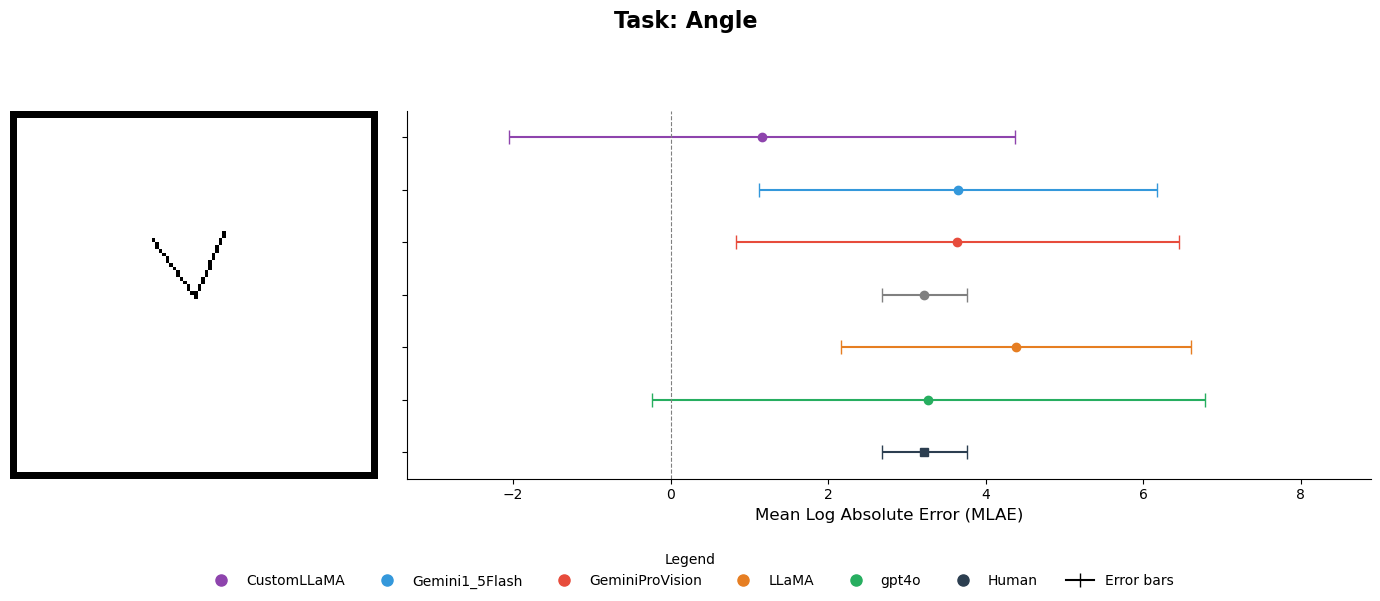

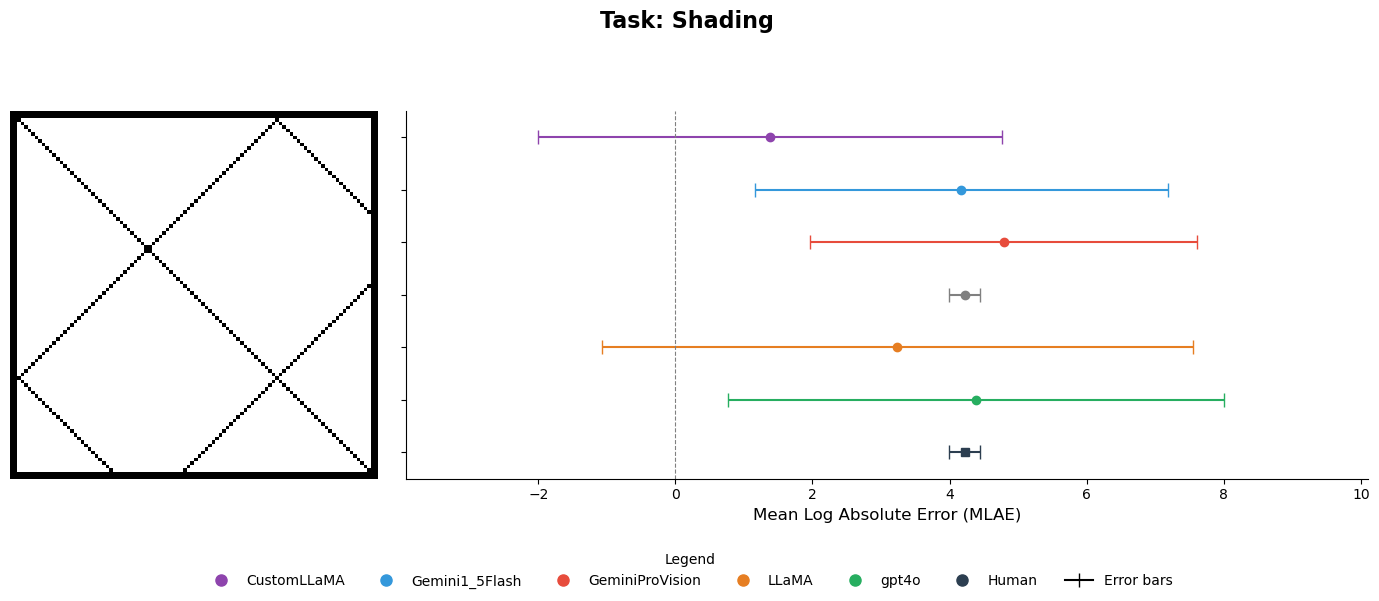

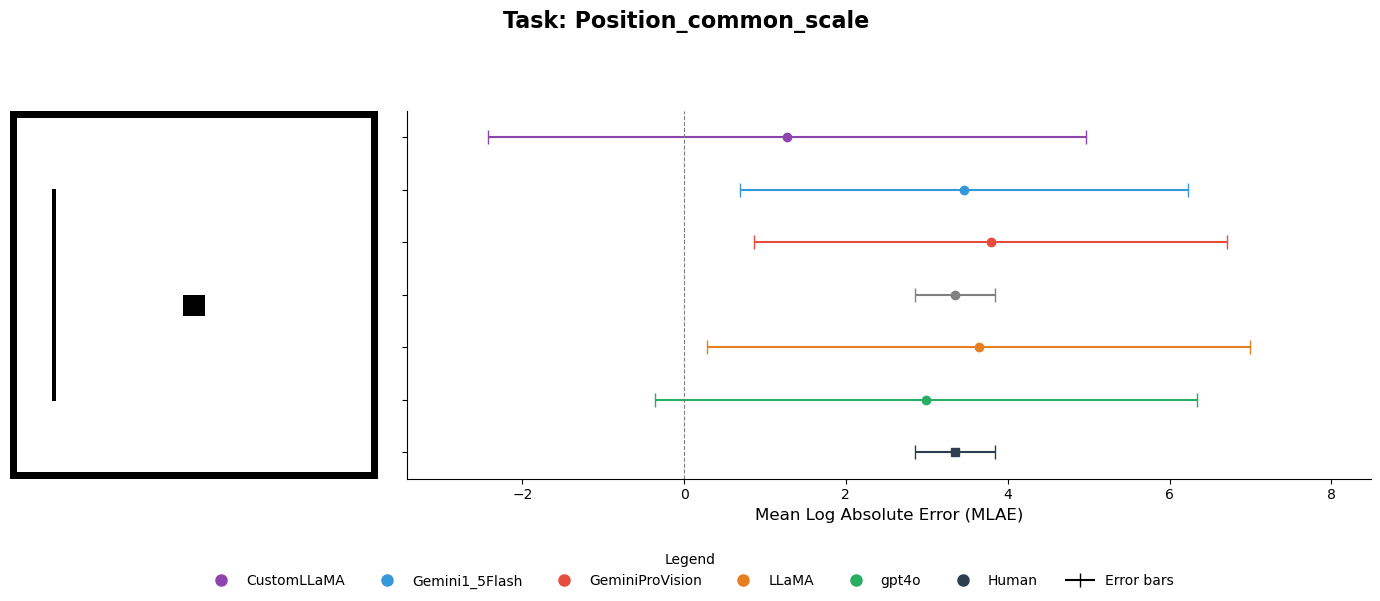

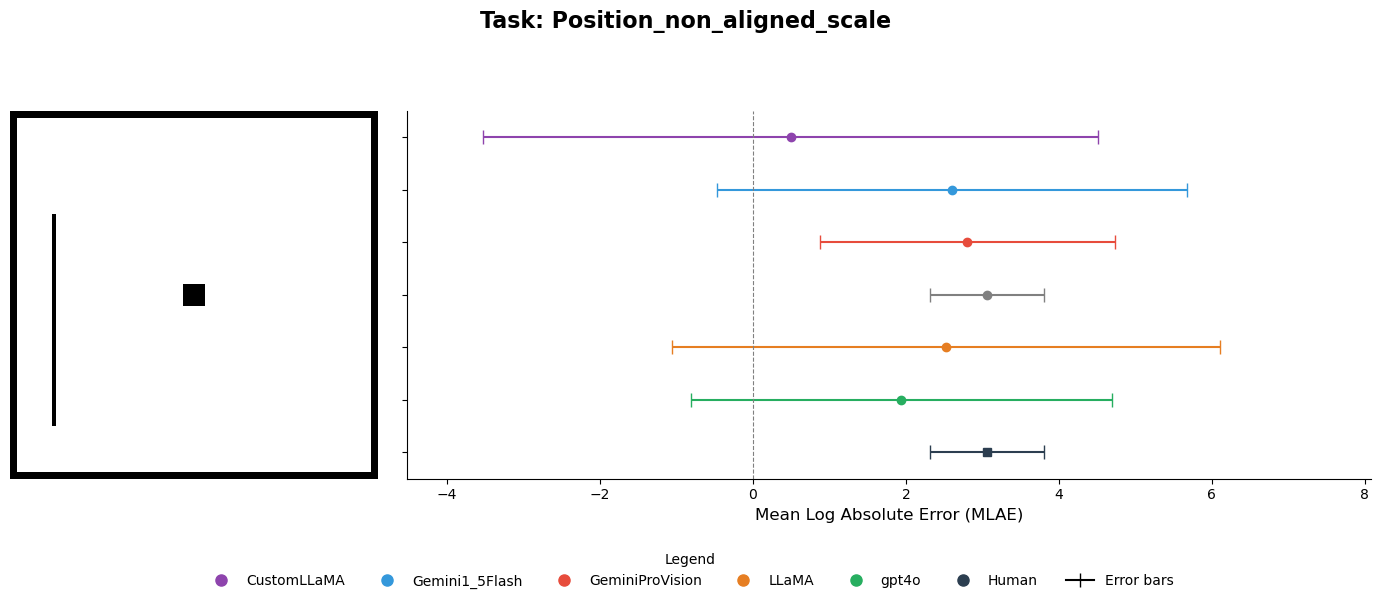

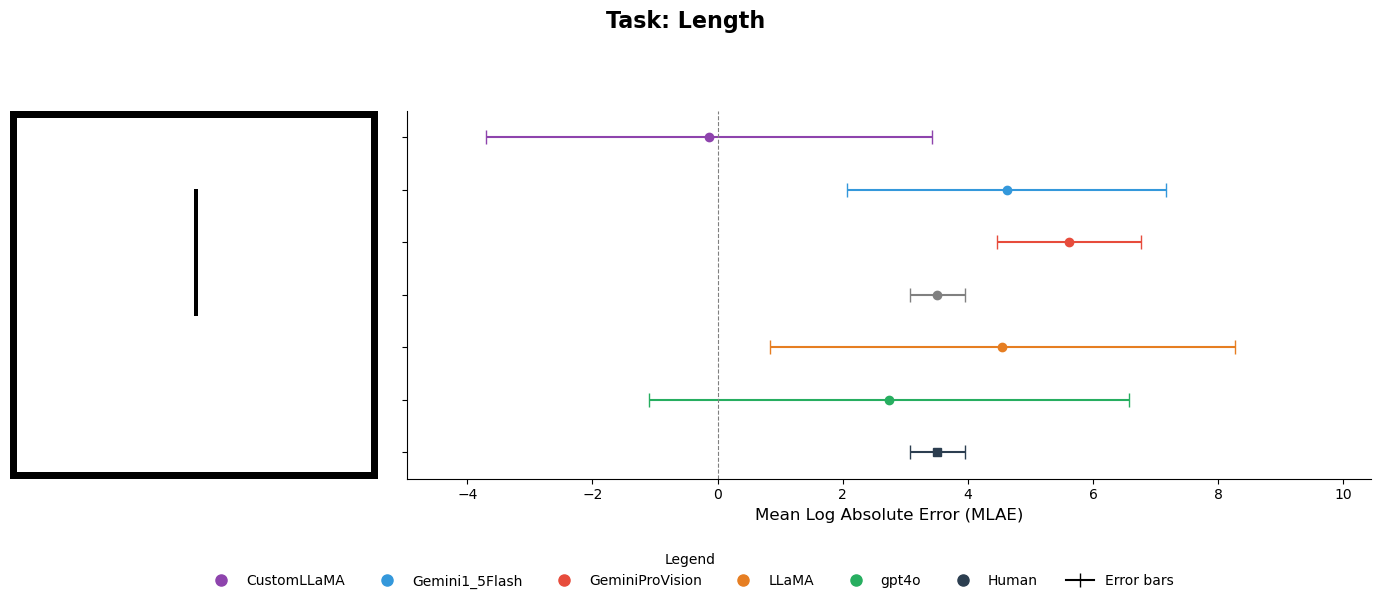

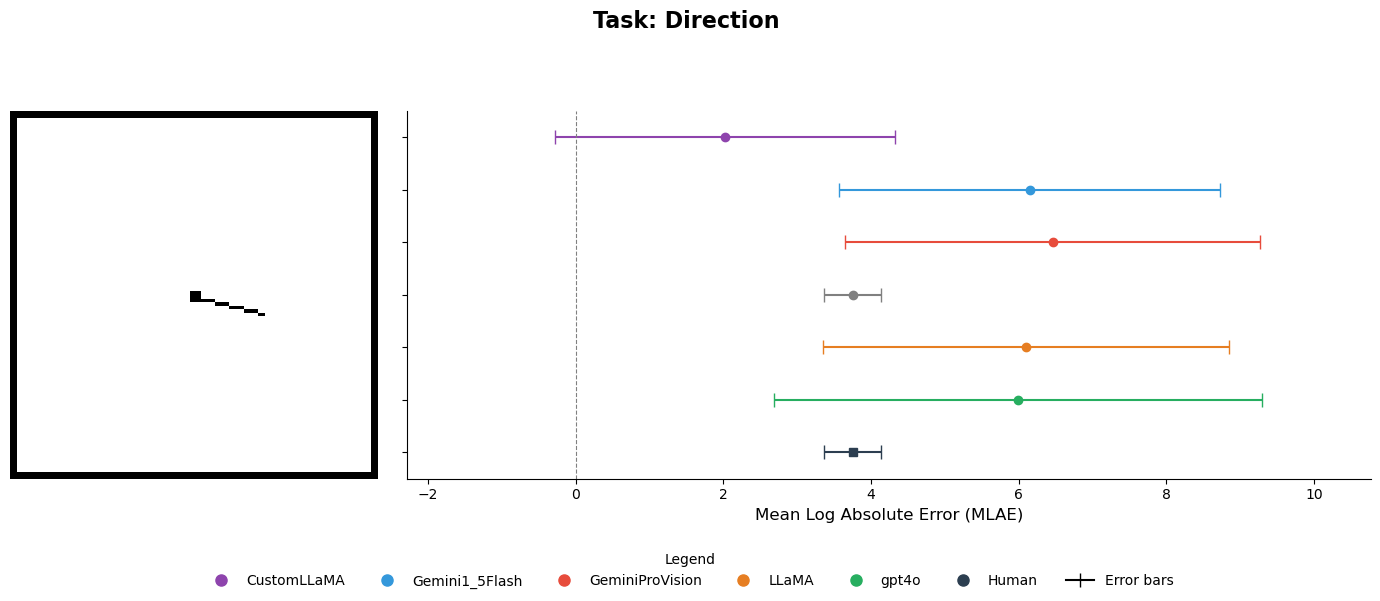

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os
import matplotlib.lines as mlines

# Define base directory and images
base_dir = "."
task_images = {
    'direction': os.path.join(base_dir, 'direction', 'direction_image_1.png'),
    'length': os.path.join(base_dir, 'length', 'length_image_1.png'),
    'position_common_scale': os.path.join(base_dir, 'position_common_scale', 'position_common_scale_image_1.png'),
    'position_non_aligned_scale': os.path.join(base_dir, 'position_non_aligned_scale', 'position_non_aligned_scale_image_1.png'),
    'angle': os.path.join(base_dir, 'angle', 'angle_image_1.png'),
    'area': os.path.join(base_dir, 'area', 'area_image_1.png'),
    'volume': os.path.join(base_dir, 'volume', 'volume_image_1.png'),
    'curvature': os.path.join(base_dir, 'curvature', 'curvature_image_1.png'),
    'shading': os.path.join(base_dir, 'shading', 'shading_image_1.png')
}

# Colors for models
model_colors = {
    'CustomLLaMA': '#8E44AD',       # Purple
    'Gemini1_5Flash': '#3498DB',    # Blue
    'GeminiProVision': '#E74C3C',   # Red
    'LLaMA': '#E67E22',             # Orange
    'gpt4o': '#27AE60',             # Green
    'Human': '#2C3E50'              # Dark color for Human data points
}

# Human MLAE and error bar data
human_data = {
    'angle': (3.22, 0.54),
    'area': (3.64, 0.38),
    'volume': (5.18, 0.40),
    'curvature': (4.13, 0.10),
    'shading': (4.22, 0.23),
    'position_common_scale': (3.35, 0.49),
    'position_non_aligned_scale': (3.06, 0.74),
    'length': (3.51, 0.44),
    'direction': (3.75, 0.39)
}

def plot_single_task(task_name, task_data):
    fig, (ax_img, ax_plot) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 5]})
    fig.patch.set_facecolor('white')
    fig.suptitle(f"Task: {task_name.capitalize()}", fontsize=16, color="black", fontweight='bold')

    # Display task image
    img_path = task_images.get(task_name)
    if img_path and os.path.exists(img_path):
        img = Image.open(img_path).convert("L")
        img_inverted = ImageOps.invert(img)
        img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=2, fill="black")
        ax_img.imshow(img_with_border)
        ax_img.axis('off')
    else:
        ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=12, color="black")
        ax_img.set_facecolor("white")

    # Sort models and set up y positions
    sorted_model_names = sorted(task_data['Model'].unique())
    y_positions = np.arange(len(sorted_model_names) + 1)  # +1 for Human

    # Calculate min and max for MLAE values and confidence intervals
    mlae_values = []
    confidence_intervals = []

    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['Model'] == model_name]
        mlae_value = model_data['Average MLAE'].values[0]
        confidence_interval = model_data['Confidence Interval (95%)'].values[0]
        
        mlae_values.append(mlae_value)
        confidence_intervals.append(confidence_interval)
        
        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o', color=model_colors.get(model_name, 'gray'),
                         capsize=5, label=model_name if j == 0 else None)  # Label only once for legend

    # Add human MLAE if available
    if task_name in human_data:
        human_mlae, human_error = human_data[task_name]
        mlae_values.append(human_mlae)
        confidence_intervals.append(human_error)
        
        ax_plot.errorbar(human_mlae, len(sorted_model_names), xerr=human_error, fmt='s', color=model_colors['Human'],
                         capsize=5, label="Human")

    # Dynamically set x-axis limits based on MLAE values and confidence intervals
    max_label = max(mlae_values) + max(confidence_intervals)
    min_label = min(mlae_values) - max(confidence_intervals)
    ax_plot.set_xlim(min_label - 1, max_label + 1)  # Add padding for better visualization

    # Customize ax_plot
    ax_plot.axvline(0, color="gray", linestyle="--", linewidth=0.8)
    ax_plot.set_ylim(-0.5, len(sorted_model_names) + 0.5)
    ax_plot.invert_yaxis()
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])  # Remove y-axis labels
    ax_plot.tick_params(axis='y', which='minor', left=False)  # Hide y-axis minor ticks
    ax_plot.set_xlabel("Mean Log Absolute Error (MLAE)", fontsize=12)

    # Hide plot borders
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)

    # Custom legend with model colors and error bar label
    custom_legend = [mlines.Line2D([], [], color=color, marker='o', linestyle='', markersize=8, label=name)
                     for name, color in model_colors.items()]
    error_bar_legend = mlines.Line2D([], [], color='black', linestyle='-', marker='|', markersize=10, linewidth=1.5, label='Error bars')
    custom_legend.append(error_bar_legend)
    
    fig.legend(handles=custom_legend, loc='lower center', ncol=len(custom_legend), frameon=False, title="Legend", fontsize=10)

    plt.tight_layout(rect=[0, 0.1, 1, 0.9])  # Leave space for legend and title
    plt.show()


def clean_task_name(task_name):
    return task_name.replace("df_", "")

# Use cleaned task name to call the function
for task_name in summary_stats_by_task:
    plot_single_task(clean_task_name(task_name), summary_stats_by_task[task_name])


In [67]:
df_curvature['model_name'].unique()

array(['gpt4o', 'CustomLLaMA', 'LLaMA', 'GeminiProVision',
       'Gemini1_5Flash'], dtype=object)

In [8]:
# Ensure model names in the data match the `all_models` list
summary_stats_by_task[task_name]['Model'] = summary_stats_by_task[task_name]['Model'].replace({
    'CustomLlama': 'Fine-tuned Llama',  # Replace old name with new name
    'Fine-tuned LLama': 'Fine-tuned Llama',  # Fix case mismatch
    'Human': 'Human 1',  # If needed
})


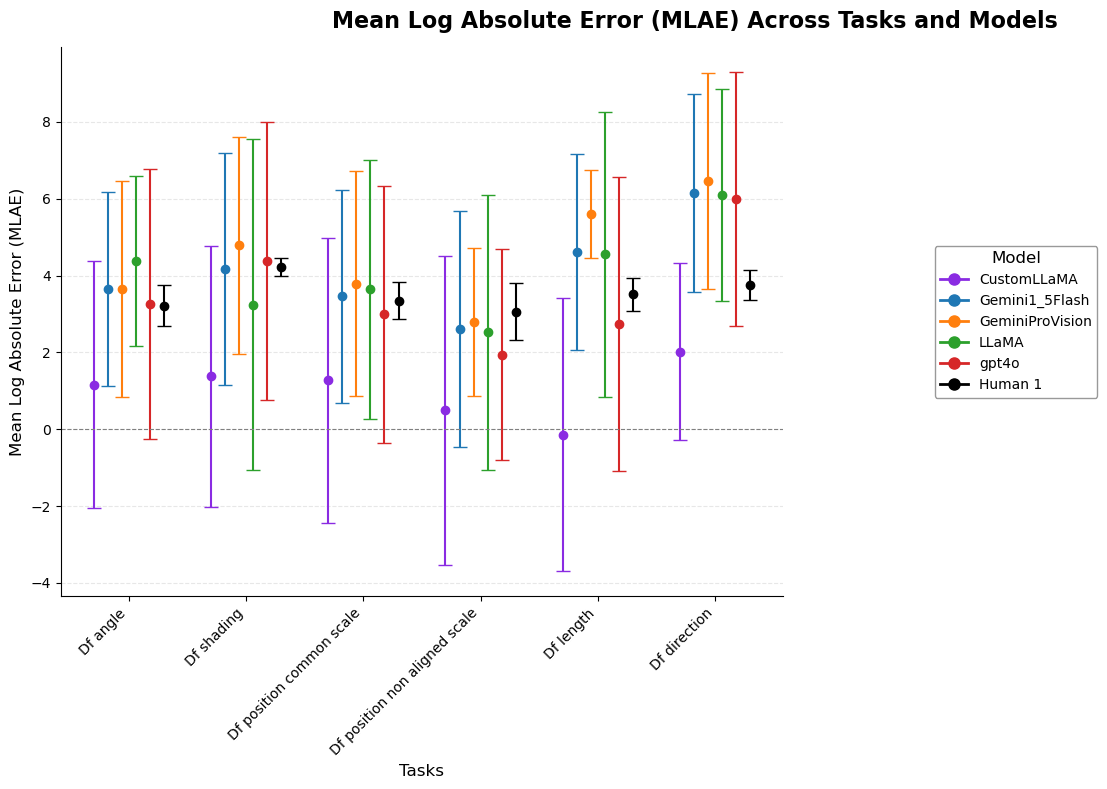

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats


# Step 1: Calculate Metrics and Build Data
def calculate_metrics(dataframes, human_data):
    """Calculate MLAE and other metrics for all datasets and add human data."""
    # Dictionary to store metrics for each dataset
    metrics_summary = {}

    for df_name, df in dataframes.items():
        # Dictionary to store metrics for each model within the current DataFrame
        model_metrics = {}
        
        # Group by `model_name` and calculate metrics for each model within the dataset
        for model_name, data in df.groupby('model_name'):
            # Ensure `ground_truth` and `parsed_answers` columns are numeric
            data['ground_truth'] = pd.to_numeric(data['ground_truth'], errors='coerce')
            data['parsed_answers'] = pd.to_numeric(data['parsed_answers'], errors='coerce')
            
            # Drop rows with NaN
            data = data.dropna(subset=['ground_truth', 'parsed_answers'])
            
            # Calculate MLAE
            data['mlae'] = data.apply(
                lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125),
                axis=1
            )
            
            # Bootstrap confidence interval for MLAE
            mlae_values = data['mlae'].dropna().values
            bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
            confidence_value = 1.96 * bootstrap_result.value  # 95% confidence interval

            # Store metrics in the model_metrics dictionary
            model_metrics[model_name] = {
                'Dataset': df_name,
                'Model': model_name,
                'Average MLAE': round(data['mlae'].mean(), 2),
                'Confidence Interval (95%)': round(confidence_value, 2)
            }
        
        # Store model metrics for the current dataset
        metrics_summary[df_name] = model_metrics

    # Step 2: Convert the nested metrics_summary dictionary to a DataFrame
    metrics_table = pd.DataFrame([
        metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
    ])
    
    # Step 3: Integrate Human Data
    summary_stats_by_task = {}
    for task, human_values in human_data.items():
        task_data = metrics_table[metrics_table['Dataset'] == task].copy()
        if not task_data.empty:
            # Add Human 1
            task_data = pd.concat([
                task_data,
                pd.DataFrame({
                    'Model': ['Human 1'],
                    'Average MLAE': [human_values[0]],
                    'Confidence Interval (95%)': [human_values[1]]
                })
            ], ignore_index=True)
        summary_stats_by_task[task] = task_data

    return summary_stats_by_task


def plot_custom_design(summary_stats_by_task):
    """Generate the MLAE plot."""
    # Extract all model names and task names
    all_models = ['CustomLLaMA', 'Gemini1_5Flash', 'GeminiProVision', 'LLaMA', 'gpt4o', 'Human 1']
    all_tasks = list(summary_stats_by_task.keys())
    task_positions = np.arange(len(all_tasks))

    # Define custom colors for models
    model_colors = {
        'CustomLLaMA': '#8a2be2',  # Purple
        'Gemini1_5Flash': '#1f77b4',  # Blue
        'GeminiProVision': '#ff7f0e',  # Orange
        'LLaMA': '#2ca02c',  # Green
        'gpt4o': '#d62728',  # Red
        'Human 1': '#000000'  # Black
    }

    # Define offsets for separating models
    num_models = len(all_models)
    offset = 0.1
    offsets = np.linspace(-offset * num_models / 2, offset * num_models / 2, num_models)

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor('white')
    fig.suptitle("Mean Log Absolute Error (MLAE) Across Tasks and Models", fontsize=16, fontweight='bold')

    # Plot MLAE for each model across tasks
    for i, model_name in enumerate(all_models):
        mlae_values = []
        confidence_intervals = []
        for task_name in all_tasks:
            task_data = summary_stats_by_task[task_name]
            if model_name in task_data['Model'].values:
                model_data = task_data[task_data['Model'] == model_name]
                mlae_values.append(model_data['Average MLAE'].values[0])
                confidence_intervals.append(model_data['Confidence Interval (95%)'].values[0])
            else:
                mlae_values.append(None)
                confidence_intervals.append(None)

        # Plot points and error bars
        for j, (mlae, ci) in enumerate(zip(mlae_values, confidence_intervals)):
            if mlae is not None:
                ax.errorbar(
                    task_positions[j] + offsets[i],
                    mlae,
                    yerr=ci,
                    fmt='o', color=model_colors[model_name], capsize=5,
                    label='Fine-tuned Llama' if model_name == 'CustomLLaMA' and j == 0 else None
                )

    # Customize plot
    ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)
    ax.set_xticks(task_positions)
    ax.set_xticklabels([task.replace('_', ' ').capitalize() for task in all_tasks], rotation=45, ha="right", fontsize=10)
    ax.set_xlabel("Tasks", fontsize=12)
    ax.set_ylabel("Mean Log Absolute Error (MLAE)", fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)

    # Add vertical legend styled like the image
    handles = [
        plt.Line2D([0], [0], color=color, marker='o', markersize=8, linestyle='-', linewidth=2, label=model_name)
        for model_name, color in model_colors.items()
    ]
    legend = ax.legend(
        handles=handles,
        bbox_to_anchor=(1.2, 0.5),  # Place legend to the right of the plot
        loc='center left',  # Center vertically, left-aligned
        frameon=True,  # Add a frame around the legend
        fontsize=10,
        title="Model",
        title_fontsize=12
    )

    # Customize the legend frame
    legend.get_frame().set_edgecolor('gray')  # Light gray border
    legend.get_frame().set_linewidth(1)  # Set frame line width

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to accommodate the legend
    return fig, ax



human_data = {
    'df_angle': (3.22, 0.54),
    'df_shading': (4.22, 0.23),
    'df_position_common_scale': (3.35, 0.49),
    'df_position_non_aligned_scale': (3.06, 0.74),
    'df_length': (3.51, 0.44),
    'df_direction': (3.75, 0.39)
}

# Process metrics and generate plot
summary_stats_by_task = calculate_metrics(dataframes, human_data)
fig, ax = plot_custom_design(summary_stats_by_task)
plt.show()


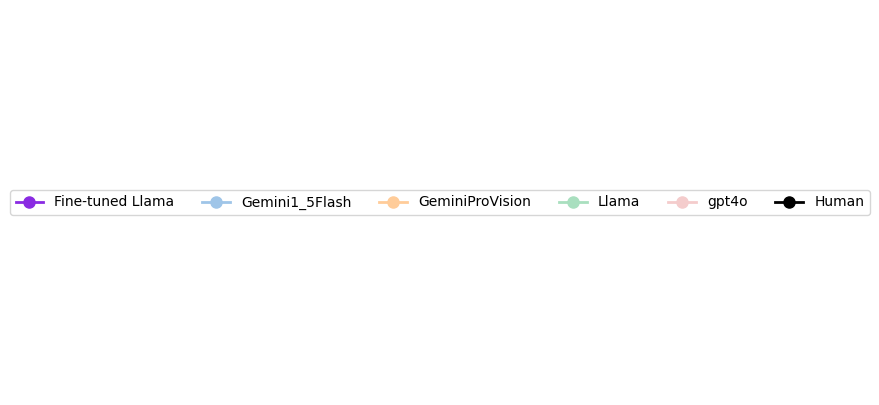

In [34]:
import matplotlib.pyplot as plt

# Define custom colors for models
model_colors = {
    'Fine-tuned Llama': '#8a2be2',  # Purple
    'Gemini1_5Flash': '#9fc5e8',  # Light Blue
    'GeminiProVision': '#ffcc99',  # Light Orange
    'Llama': '#a9dfbf',  # Light Green
    'gpt4o': '#f4cccc',  # Light Red
    'Human': '#000000'  # Black
}

# Create handles for the legend
handles = [
    plt.Line2D([0], [0], color=color, marker='o', markersize=8, linestyle='-', linewidth=2, label=label)
    for label, color in model_colors.items()
]

# Create a figure for the legend only
fig = plt.figure(figsize=(3, 5))  # Adjust size for the legend
ax = fig.add_subplot(111)

# Hide axes
ax.axis('off')

# Add the legend
legend = ax.legend(
    handles=handles,
    loc='center',  # Center the legend
    ncol=len(model_colors),  # Arrange all items in a single row
    frameon=True,  # Add frame
    title_fontsize=12,
    fontsize=10
)

# Customize the legend frame
#legend.get_frame().set_edgecolor('gray')  # Light gray border
#legend.get_frame().set_linewidth(1)  # Set frame line width

plt.show()


In [58]:
def check_data(summary_stats_by_task):
    print("=== Checking Task Names and Model Names ===")
    
    # List all task names
    print("\nTask Names:")
    for task_name in summary_stats_by_task.keys():
        print(f" - {task_name}")
    
    # Check model names for each task
    print("\nModel Names by Task:")
    for task_name, task_data in summary_stats_by_task.items():
        print(f"Task: {task_name}")
        print("  Models:", task_data['Model'].unique())  # List unique model names

# Example: Call the function with your data
check_data(summary_stats_by_task)


=== Checking Task Names and Model Names ===

Task Names:
 - df_direction
 - df_length
 - df_position_common_scale
 - df_position_non_aligned_scale
 - df_angle
 - df_area
 - df_volume
 - df_curvature
 - df_shading

Model Names by Task:
Task: df_direction
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_length
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_position_common_scale
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_position_non_aligned_scale
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_angle
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_area
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_volume
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_curvature
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 

### 7. Filter and sort model data and caculate for each model

In [8]:
def filter_and_sort_df(df, model_name="all"):
    """
    Filter and sort the df DataFrame by model name, removing '.0' for integer values.
    
    Parameters:
    - df: pandas.DataFrame, the DataFrame to filter and sort
    - model_name: str, specific model name to filter or "all" for all models
    
    Returns:
    - pandas.DataFrame: The filtered and sorted DataFrame without styling
    """
    # Filter by model name or select all
    if model_name != "all":
        filtered_df = df[df['model_name'] == model_name]
    else:
        filtered_df = df

    # Sort by 'ground_truth' and 'parsed_answers'
    filtered_sorted_df = filtered_df.sort_values(by=['ground_truth', 'parsed_answers'])
    
    # Convert 'ground_truth' and 'parsed_answers' to integer if they are whole numbers
    filtered_sorted_df['ground_truth'] = filtered_sorted_df['ground_truth'].apply(
        lambda x: int(float(x)) if float(x).is_integer() else float(x)
    )
    filtered_sorted_df['parsed_answers'] = filtered_sorted_df['parsed_answers'].apply(
        lambda x: int(float(x)) if float(x).is_integer() else float(x)
    )

    return filtered_sorted_df[['ground_truth', 'parsed_answers', 'model_name']]



### 8. Display 20 images for each task

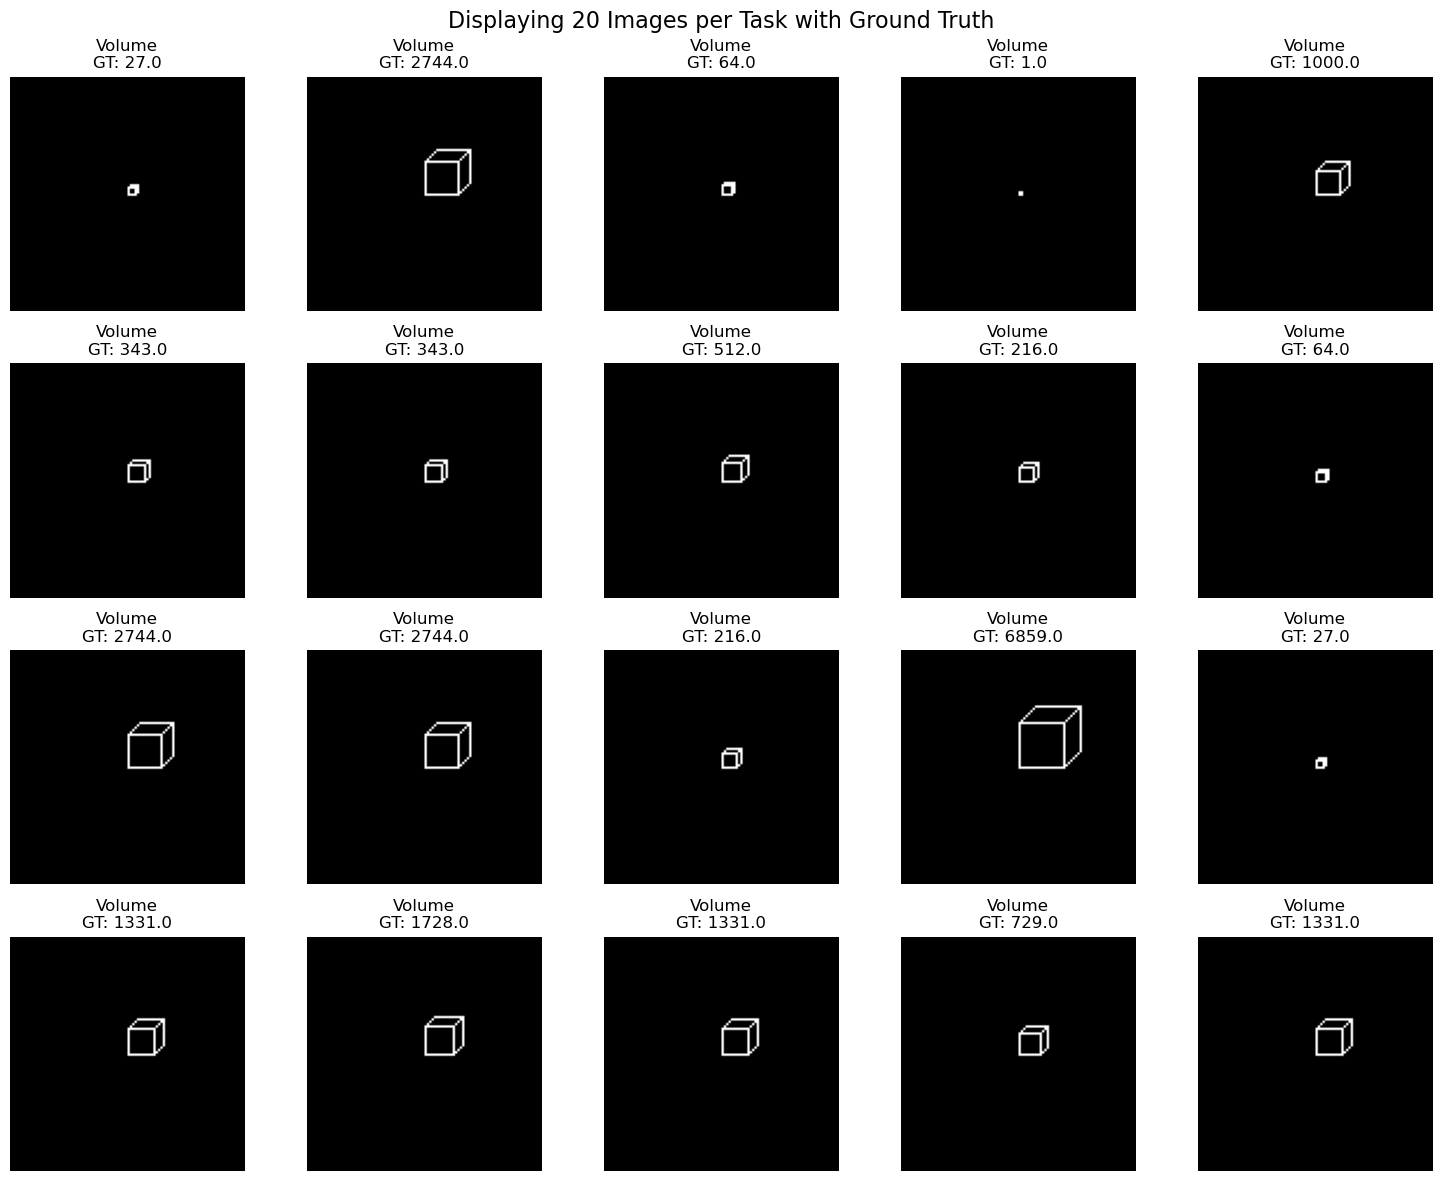

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "."

# Task selection for quick customization
# Define the number of images per task to display and specify the tasks to show
num_images = 20  # Number of images to display per task
tasks = ["volume"]  # Example: choose specific tasks or set to "all" for all tasks

csv_files = {
    'direction': './direction_results.csv', 
    'length': './length_results.csv', 
    'position_common_scale': './position_common_scale_results.csv', 
    'position_non_aligned_scale': './position_non_aligned_scale_results.csv',
    'angle': './angle_results.csv',
    'area': './area_results.csv',
    'volume': './volume_results.csv',
    'curvature': './curvature_results.csv',
    'shading': './shading_results.csv'
}
def display_images(num_images, tasks="all"):
    # Use all tasks if 'tasks' parameter is "all"
    selected_tasks = list(csv_files.keys()) if tasks == "all" else tasks

    # Calculate total number of subplots needed
    total_images = len(selected_tasks) * num_images
    num_cols = 5
    num_rows = (total_images + num_cols - 1) // num_cols  # Automatically adjust rows

    # Create figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    fig.suptitle(f"Displaying {num_images} Images per Task with Ground Truth", fontsize=16)
    
    # Flatten axes for easy iteration
    axes = axes.flatten()

    plot_idx = 0  # To keep track of the current subplot index
    for task in selected_tasks:
        # Check if the CSV file exists for the task
        csv_file = csv_files.get(task)
        if not os.path.exists(csv_file):
            print(f"CSV file not found: {csv_file}")
            continue

        # Load CSV data
        results_df = pd.read_csv(csv_file)

        # Limit to num_images or the number of rows in the CSV, whichever is smaller
        num_to_display = min(num_images, len(results_df))

        # Loop to display each image for the task
        for i in range(num_to_display):
            if plot_idx >= num_rows * num_cols:
                break
            
            # Get the row data and image path
            row = results_df.iloc[i]
            image_filename = os.path.basename(row["image_path"])
            image_path = os.path.join(base_folder, task, image_filename)
            ground_truth = row["ground_truth"]

            # Display image if exists, else show 'Image not found'
            if os.path.exists(image_path):
                img = Image.open(image_path)
                axes[plot_idx].imshow(img, cmap="gray")
                axes[plot_idx].set_title(f"{task.capitalize()}\nGT: {ground_truth}")
            else:
                print(f"Image not found: {image_path}")
                axes[plot_idx].set_title(f"{task.capitalize()}\nImage not found")

            axes[plot_idx].axis("off")
            plot_idx += 1

    # Hide any remaining empty subplots
    for j in range(plot_idx, num_rows * num_cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Call the function with the specified number of images and tasks
display_images(num_images, tasks)


In [51]:
df_volume

# Set display options to show all rows and all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Set to None to display full cell content


In [7]:
import pandas as pd
import os

def filter_sort_and_group_df(df, model_name='CustomLLaMA', base_folder=''):
    """
    Filters, sorts, and groups a DataFrame for a specific model name,
    then aggregates parsed answers by ground_truth and adds the full path for images.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - model_name (str): The model name to filter on, default is 'CustomLLaMA'.
    - base_folder (str): The base folder path to prepend to image paths.

    Returns:
    - pd.DataFrame: A filtered, sorted, and grouped DataFrame with full image paths.
    """
    # Filter for the specified model name
    df_filtered = df[df['model_name'] == model_name]

    # Ensure numeric conversion for sorting, if necessary
    df_filtered['ground_truth'] = pd.to_numeric(df_filtered['ground_truth'], errors='coerce')
    df_filtered['parsed_answers'] = pd.to_numeric(df_filtered['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df_filtered.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed_answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Usage example:
# Specify the base folder path for images
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results/volume/"

# Call the function with df_area and the base folder
df_area_processed = filter_sort_and_group_df(df_area, base_folder=base_folder)
df_volume_processed = filter_sort_and_group_df(df_volume, base_folder=base_folder)

# Display the processed DataFrame
df_area_processed
df_volume_processed
df_area_processed


/tmp/ipykernel_393437/3089951510.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ground_truth'] = pd.to_numeric(df_filtered['ground_truth'], errors='coerce')
/tmp/ipykernel_393437/3089951510.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['parsed_answers'] = pd.to_numeric(df_filtered['parsed_answers'], errors='coerce')
/tmp/ipykernel_393437/3089951510.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,ground_truth,parsed_answers,image_path
0,113.097336,"[314.2, 314.2, 380.1]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
1,153.938040,"[153.9, 153.9, 153.9, 153.9, 153.9, 153.9]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
2,201.061930,"[153.9, 201.1, 228.3]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
3,254.469005,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
4,314.159265,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
5,452.389342,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
6,615.752160,"[314.2, 804.2, 804.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
7,706.858347,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
8,804.247719,"[2827.4, 2827.4, 2827.4]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
9,1017.876020,"[1017.9, 1017.9, 1134.1]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...


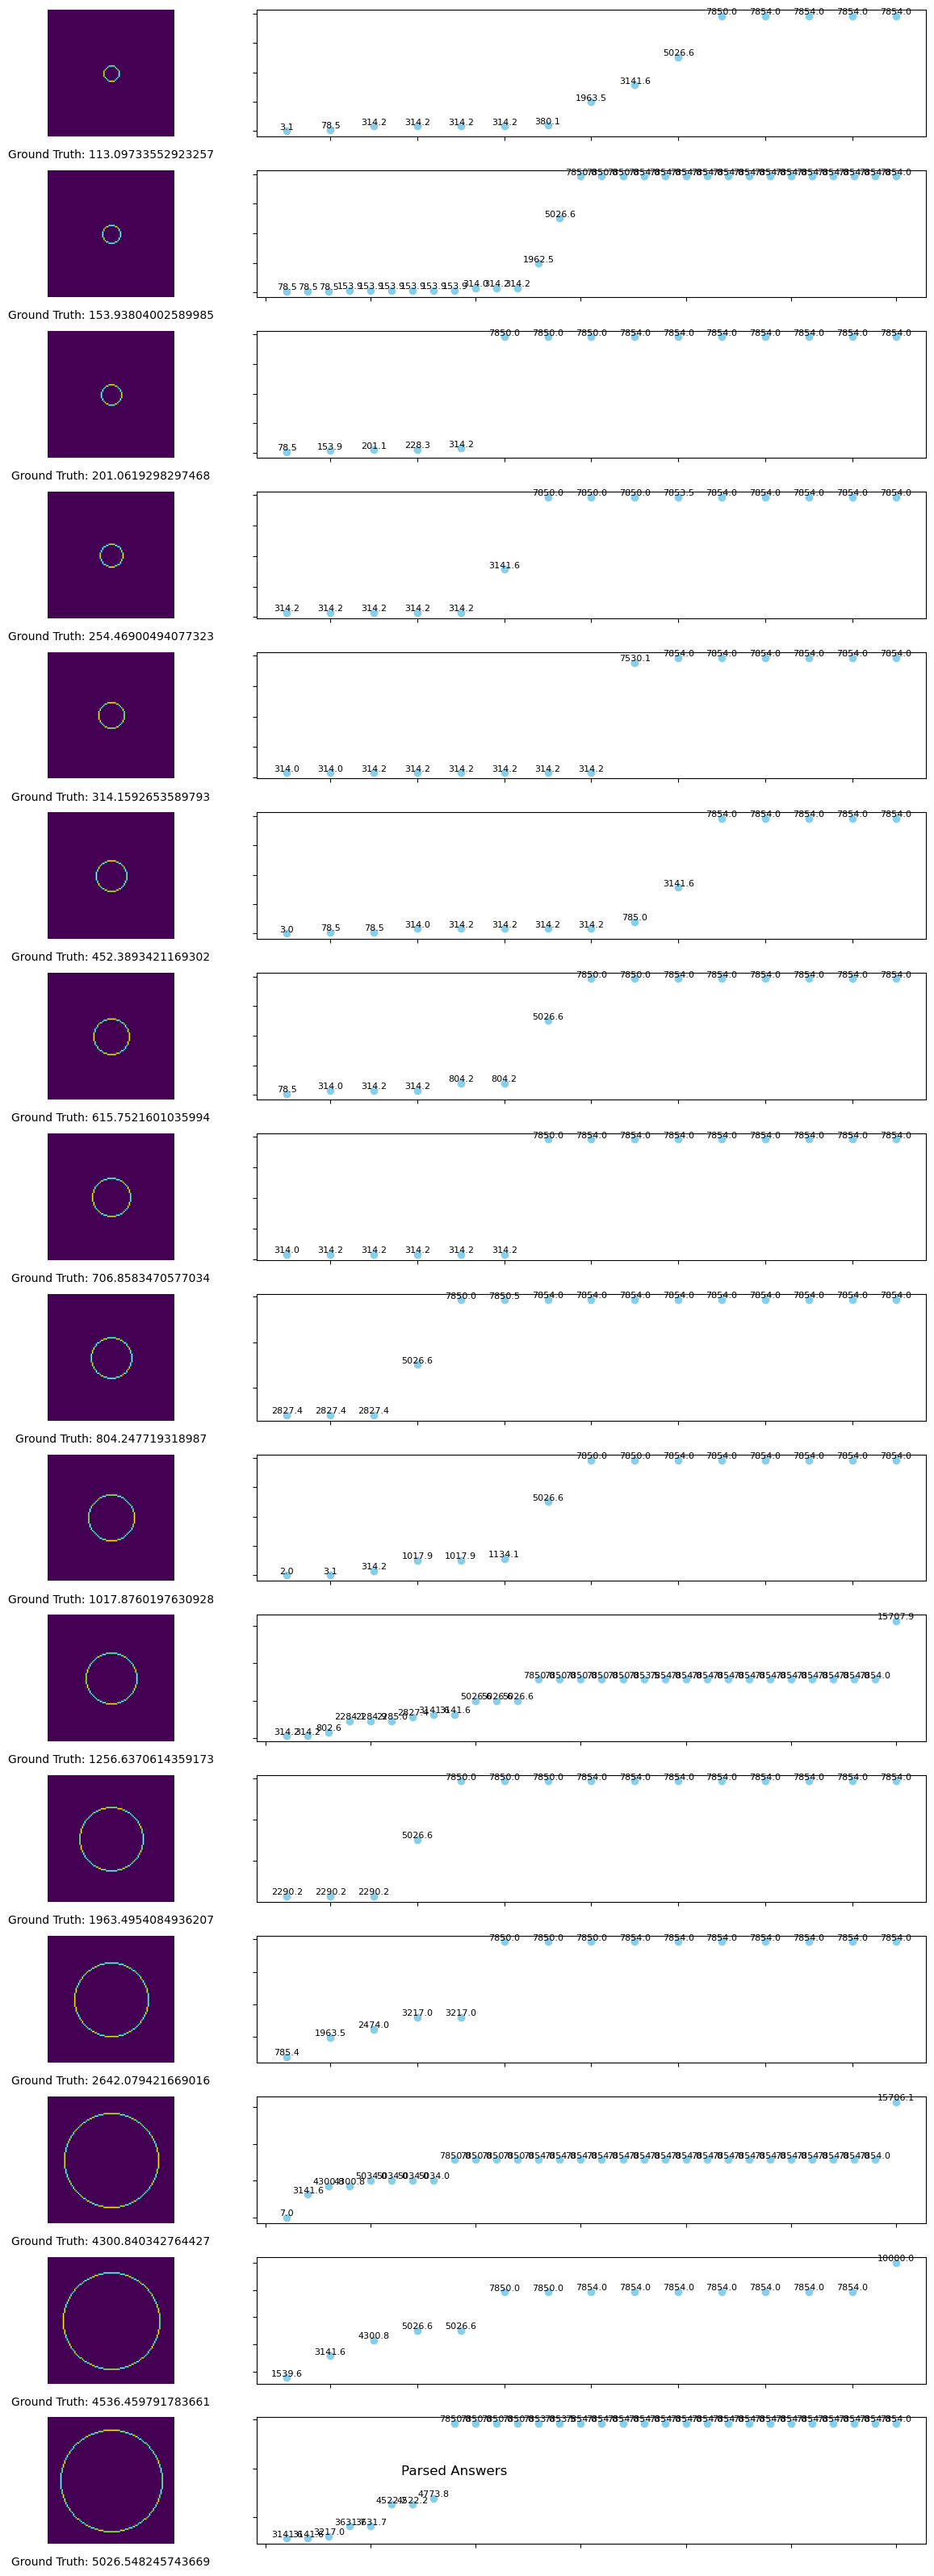

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the parameters
# Set your dataset and base folder path here
dataset = df_area  # Change this to df_volume or any other DataFrame you want to process
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results/area/"  # Adjust the folder path for area dataset

def filter_sort_and_group_df(df, base_folder=''):
    """
    Sorts and groups a DataFrame by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - base_folder (str): The base folder path to prepend to image paths.

    Returns:
    - pd.DataFrame: A sorted and grouped DataFrame with full image paths.
    """
    # Ensure numeric conversion for sorting, if necessary
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed_answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization
# Set up the figure layout with two sections: images and parsed answers
fig, axes = plt.subplots(len(unique_ground_truth_df), 2, figsize=(12, len(unique_ground_truth_df) * 2), 
                         gridspec_kw={'width_ratios': [1, 3]})

# Loop over each unique ground_truth and plot its parsed_answers as points on a scatter plot
for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    # Get the full path for each image
    image_path = row['image_path']
    if os.path.exists(image_path):
        # Load and display the image on the left
        img = Image.open(image_path)
        ax_img = axes[i, 0]
        ax_img.imshow(img)
        ax_img.axis('off')  # Turn off the axis for the image
        
        # Add ground_truth label under the image
        ax_img.text(0.5, -0.1, f"Ground Truth: {row['ground_truth']}", 
                    ha='center', va='top', transform=ax_img.transAxes, fontsize=10)

    # Right side: Plot parsed_answers as a scatter plot
    ax_scatter = axes[i, 1]
    y_values = row['parsed_answers']
    x_values = list(range(1, len(y_values) + 1))  # Use indices (1, 2, 3, ...) as x-axis for each parsed answer

    # Plot points as circles and add labels for each point
    ax_scatter.plot(x_values, y_values, 'o', color='skyblue')
    for x, y in zip(x_values, y_values):
        ax_scatter.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color='black')  # Add label above each point

    # Remove grid, axis labels, and y-axis labels for each scatter plot
    ax_scatter.grid(False)
    ax_scatter.set_yticklabels([])
    ax_scatter.set_xticklabels([])
    ax_scatter.set_xlabel("")
    ax_scatter.set_ylabel("")

# Add a single label "Parsed Answers" in the center of the figure
fig.text(0.5, 0.04, 'Parsed Answers', ha='center', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


/tmp/ipykernel_660903/2183768206.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
/tmp/ipykernel_660903/2183768206.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')


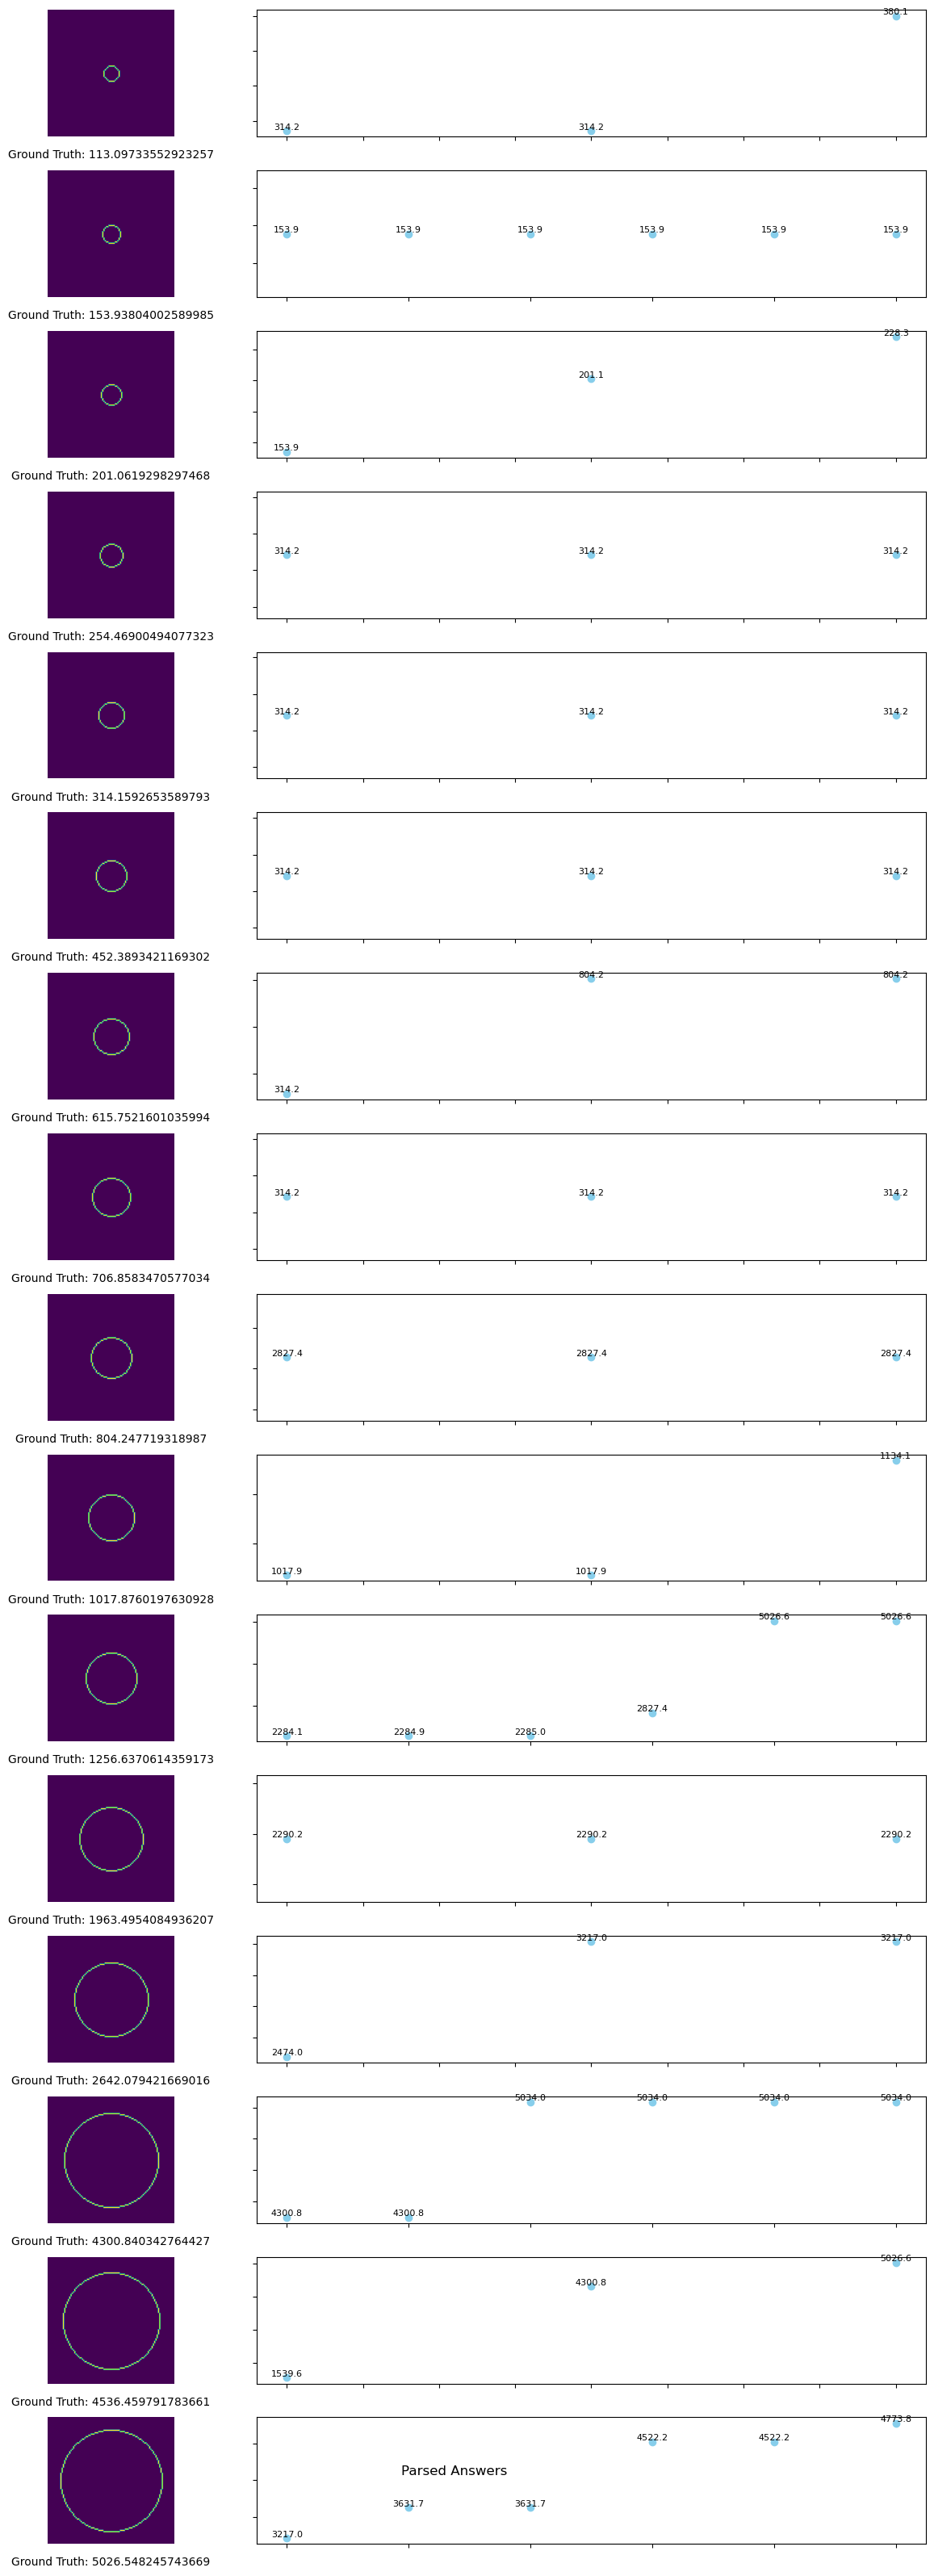

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the parameters
# Set your dataset and base folder path here
dataset = df_area  # Change this to df_volume or any other DataFrame you want to process
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results/area/"  # Adjust the folder path for area dataset

def filter_sort_and_group_df(df, base_folder=''):
    """
    Filters the DataFrame for a specific model, sorts and groups by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - base_folder (str): The base folder path to prepend to image paths.

    Returns:
    - pd.DataFrame: A sorted and grouped DataFrame with full image paths.
    """
    # Filter for the model "CustomLLaMA"
    df = df[df['model_name'] == 'CustomLLaMA']

    # Ensure numeric conversion for sorting, if necessary
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed_answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization
# Set up the figure layout with two sections: images and parsed answers
fig, axes = plt.subplots(len(unique_ground_truth_df), 2, figsize=(12, len(unique_ground_truth_df) * 2), 
                         gridspec_kw={'width_ratios': [1, 3]})

# Loop over each unique ground_truth and plot its parsed_answers as points on a scatter plot
for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    # Get the full path for each image
    image_path = row['image_path']
    if os.path.exists(image_path):
        # Load and display the image on the left
        img = Image.open(image_path)



        ax_img = axes[i, 0]
        ax_img.imshow(img)
        ax_img.axis('off')  # Turn off the axis for the image
        
        # Add ground_truth label under the image
        ax_img.text(0.5, -0.1, f"Ground Truth: {row['ground_truth']}", 
                    ha='center', va='top', transform=ax_img.transAxes, fontsize=10)

    # Right side: Plot parsed_answers as a scatter plot
    ax_scatter = axes[i, 1]
    y_values = row['parsed_answers']
    x_values = list(range(1, len(y_values) + 1))  # Use indices (1, 2, 3, ...) as x-axis for each parsed answer

    # Plot points as circles and add labels for each point
    ax_scatter.plot(x_values, y_values, 'o', color='skyblue')
    for x, y in zip(x_values, y_values):
        ax_scatter.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color='black')  # Add label above each point

    # Remove grid, axis labels, and y-axis labels for each scatter plot
    ax_scatter.grid(False)
    ax_scatter.set_yticklabels([])
    ax_scatter.set_xticklabels([])
    ax_scatter.set_xlabel("")
    ax_scatter.set_ylabel("")

# Add a single label "Parsed Answers" in the center of the figure
fig.text(0.5, 0.04, 'Parsed Answers', ha='center', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show() 

/tmp/ipykernel_660903/1620447781.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
/tmp/ipykernel_660903/1620447781.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')


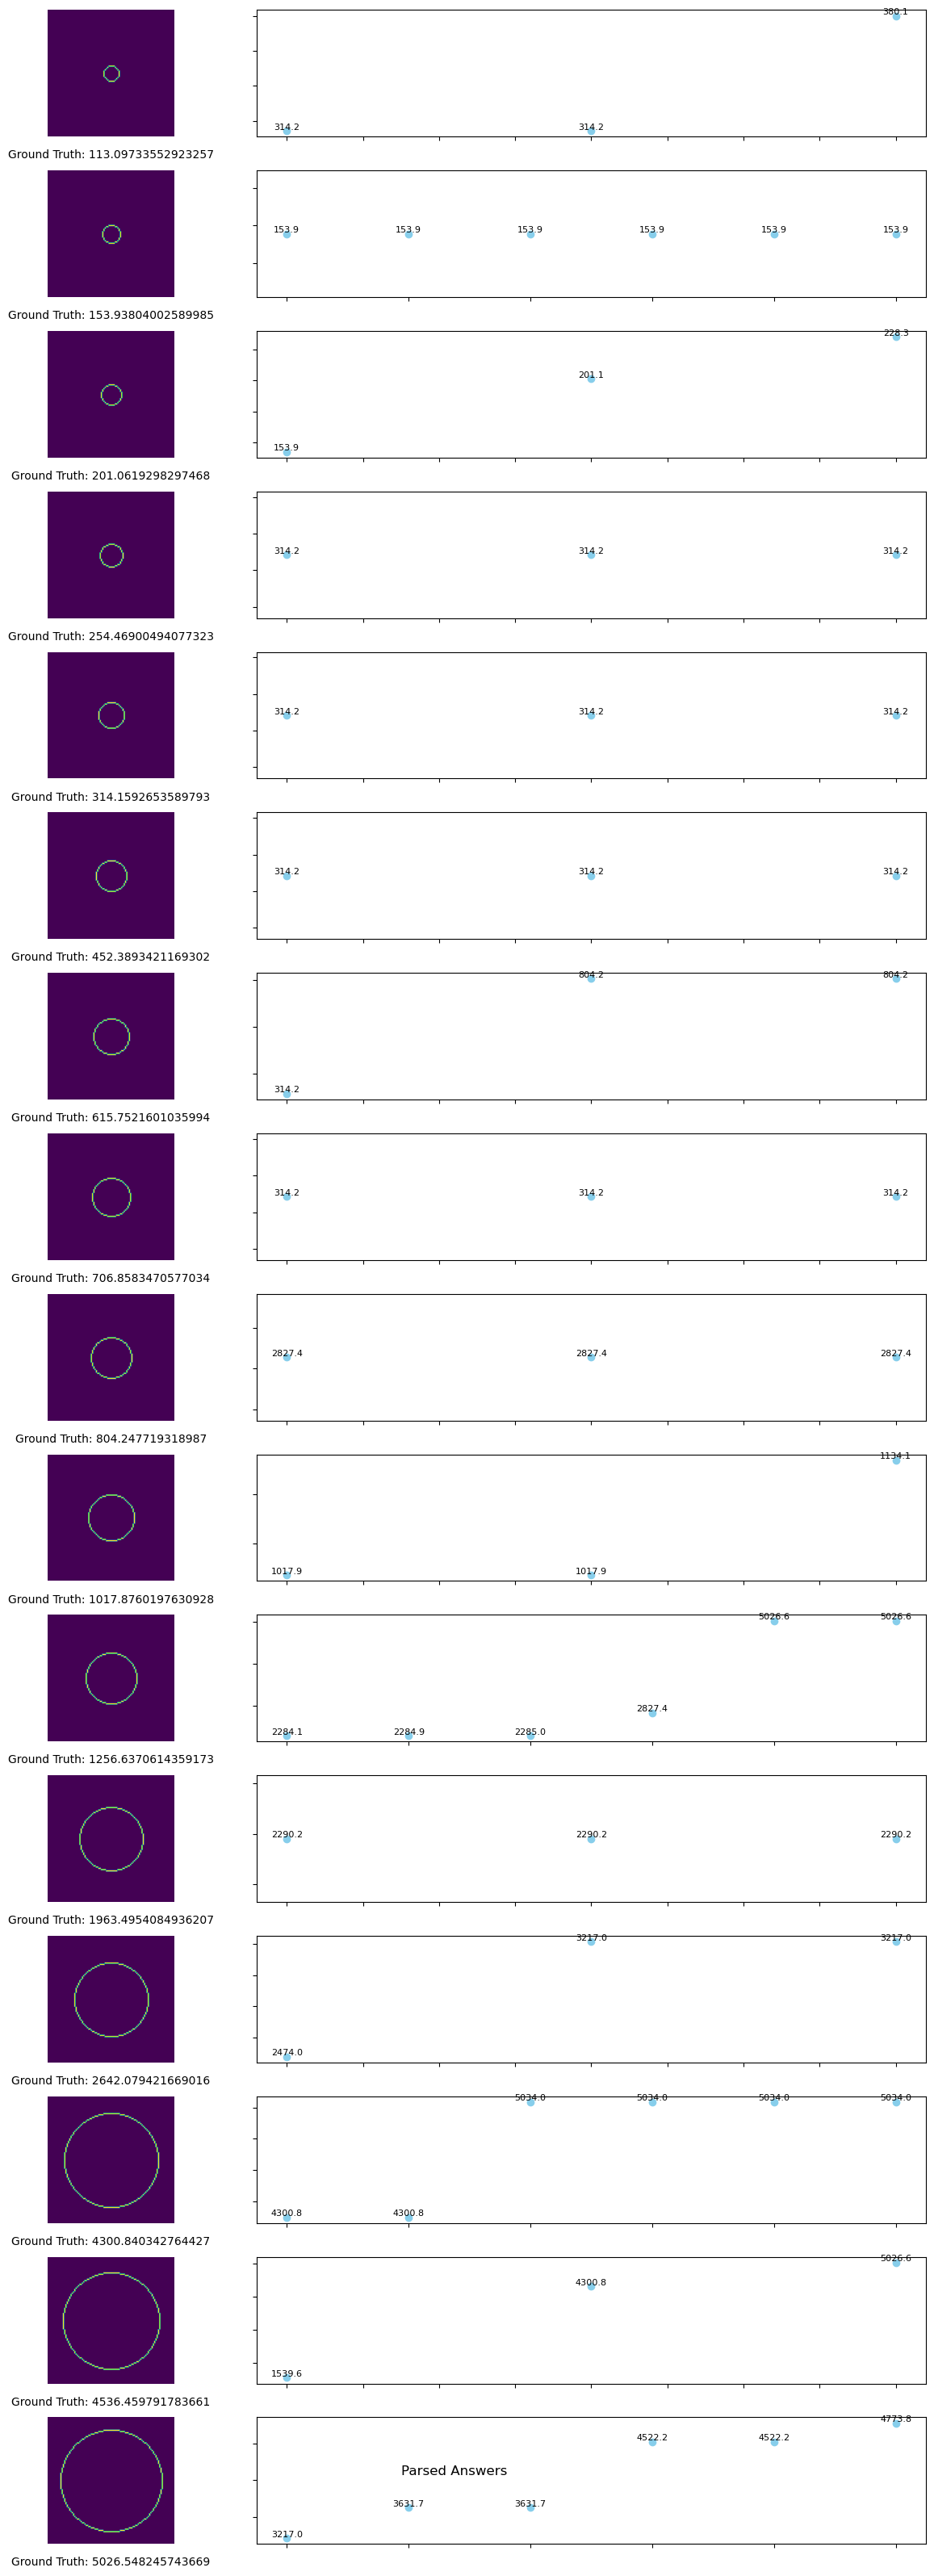

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the parameters
dataset = df_area  # Change this to df_volume or any other DataFrame you want to process
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results/area/"  # Adjust the folder path for area dataset

def filter_sort_and_group_df(df, base_folder=''):
    """
    Filters the DataFrame for a specific model, sorts and groups by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.
    """
    # Filter for the model "CustomLLaMA"
    df = df[df['model_name'] == 'CustomLLaMA']

    # Ensure numeric conversion for sorting
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization
# Set up the figure layout with two sections: images and parsed answers
fig, axes = plt.subplots(len(unique_ground_truth_df), 2, figsize=(12, len(unique_ground_truth_df) * 2), 
                         gridspec_kw={'width_ratios': [1, 3]})

# Loop over each unique ground_truth and plot its parsed_answers as points on a scatter plot
for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    # Get the full path for each image
    image_path = row['image_path']
    if os.path.exists(image_path):
        # Load and display the image on the left
        img = Image.open(image_path)
        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')  # Turn off the axis for the image
        
        # Add ground_truth label under the image
        axes[i, 0].text(0.5, -0.1, f"Ground Truth: {row['ground_truth']}", 
                       ha='center', va='top', transform=axes[i, 0].transAxes, fontsize=10)

    # Right side: Plot parsed_answers as a scatter plot
    y_values = row['parsed_answers']
    x_values = list(range(1, len(y_values) + 1))  # Use indices (1, 2, 3, ...) as x-axis for each parsed answer
    axes[i, 1].plot(x_values, y_values, 'o', color='skyblue')
    for x, y in zip(x_values, y_values):
        axes[i, 1].text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color='black')  # Add label above each point

    # Remove grid, axis labels, and y-axis labels for each scatter plot
    axes[i, 1].grid(False)
    axes[i, 1].set_yticklabels([])
    axes[i, 1].set_xticklabels([])
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel("")

# Add a single label "Parsed Answers" in the center of the figure
fig.text(0.5, 0.04, 'Parsed Answers', ha='center', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

/tmp/ipykernel_660903/1943813279.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
/tmp/ipykernel_660903/1943813279.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')


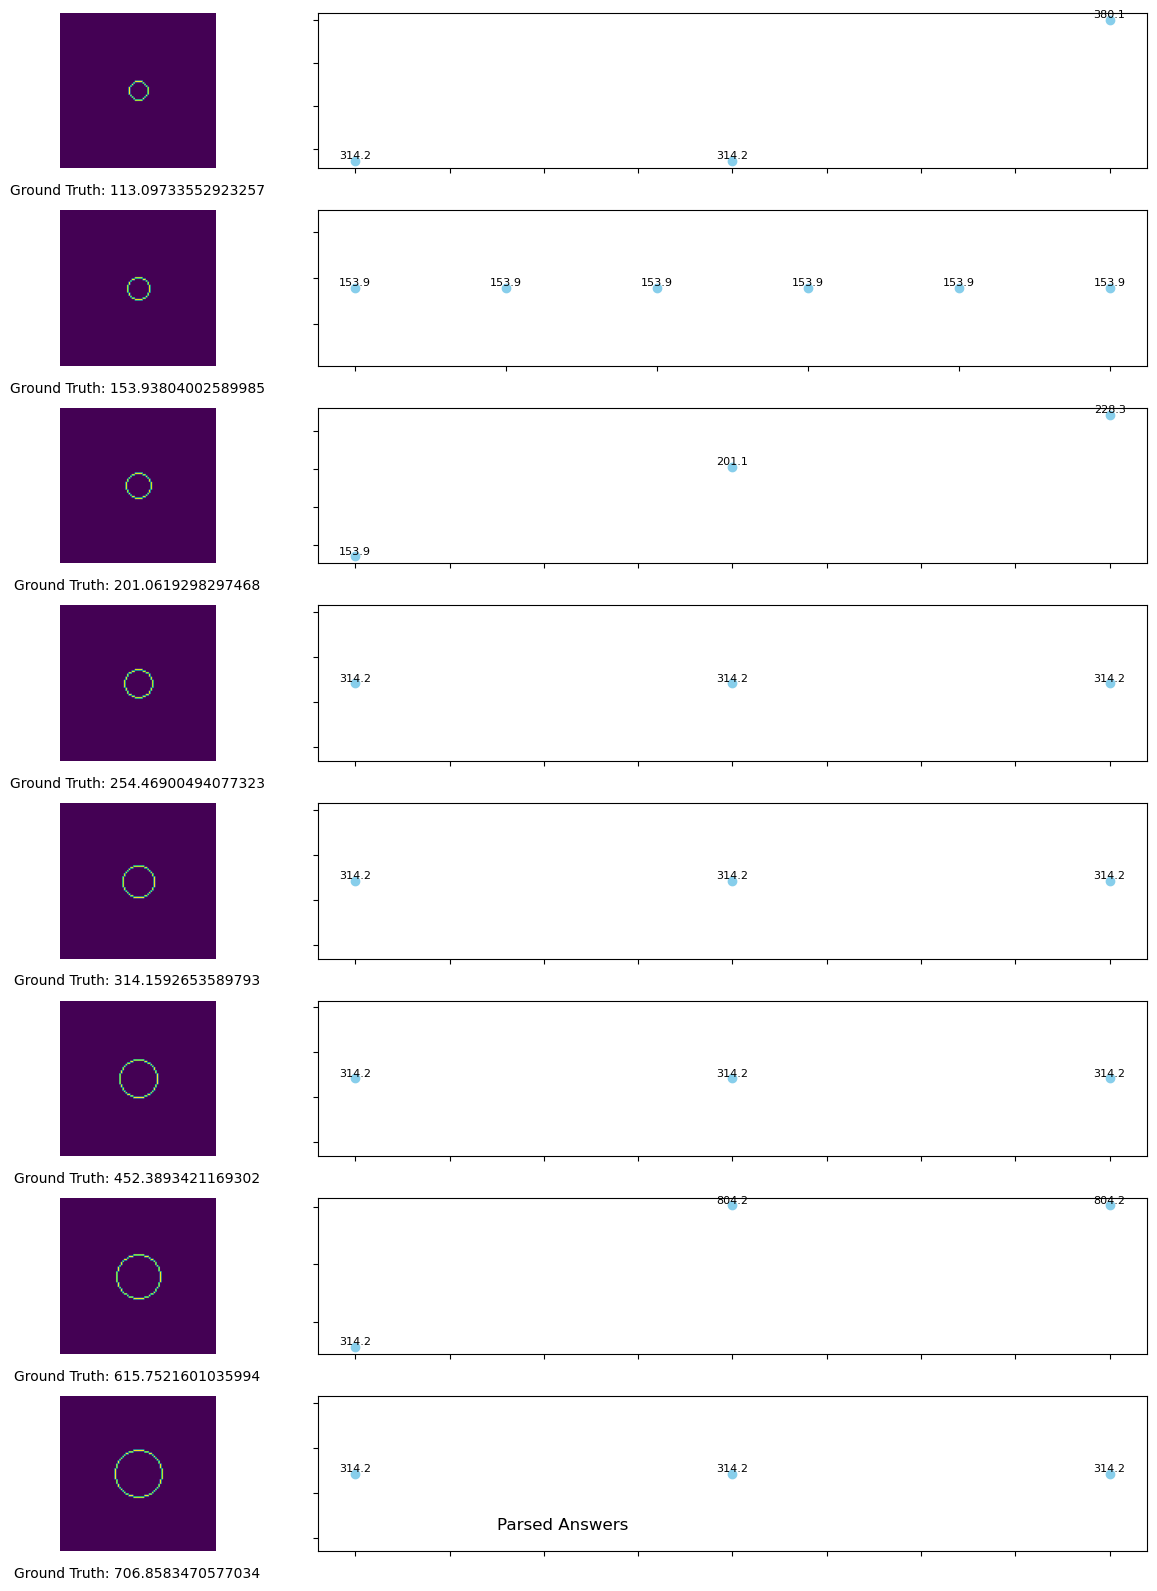

,ground_truth,parsed_answers
0,113.097336,"[314.2, 314.2, 380.1]"
1,153.938040,"[153.9, 153.9, 153.9, 153.9, 153.9, 153.9]"
2,201.061930,"[153.9, 201.1, 228.3]"
3,254.469005,"[314.2, 314.2, 314.2]"
4,314.159265,"[314.2, 314.2, 314.2]"
5,452.389342,"[314.2, 314.2, 314.2]"
6,615.752160,"[314.2, 804.2, 804.2]"
7,706.858347,"[314.2, 314.2, 314.2]"


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the parameters
dataset = df_area  # Change this to df_volume or any other DataFrame you want to process
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results/area/"  # Adjust the folder path for area dataset

def filter_sort_and_group_df(df, base_folder=''):
    """
    Filters the DataFrame for a specific model, sorts and groups by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.
    """
    # Filter for the model "CustomLLaMA" and ground truth range 113 to 804
    df = df[(df['model_name'] == 'CustomLLaMA') & 
            (df['ground_truth'] >= 113) & 
            (df['ground_truth'] <= 804)]

    # Ensure numeric conversion for sorting
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization
# Set up the figure layout with two sections: images and parsed answers
fig, axes = plt.subplots(len(unique_ground_truth_df), 2, figsize=(12, len(unique_ground_truth_df) * 2), 
                         gridspec_kw={'width_ratios': [1, 3]})

# Loop over each unique ground_truth and plot its parsed_answers as points on a scatter plot
for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    # Get the full path for each image
    image_path = row['image_path']
    if os.path.exists(image_path):
        # Load and display the image on the left
        img = Image.open(image_path)
        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')  # Turn off the axis for the image
        
        # Add ground_truth label under the image
        axes[i, 0].text(0.5, -0.1, f"Ground Truth: {row['ground_truth']}", 
                       ha='center', va='top', transform=axes[i, 0].transAxes, fontsize=10)

    # Right side: Plot parsed_answers as a scatter plot
    y_values = row['parsed_answers']
    x_values = list(range(1, len(y_values) + 1))  # Use indices (1, 2, 3, ...) as x-axis for each parsed answer
    axes[i, 1].plot(x_values, y_values, 'o', color='skyblue')
    for x, y in zip(x_values, y_values):
        axes[i, 1].text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=8, color='black')  # Add label above each point

    # Remove grid, axis labels, and y-axis labels for each scatter plot
    axes[i, 1].grid(False)
    axes[i, 1].set_yticklabels([])
    axes[i, 1].set_xticklabels([])
    axes[i, 1].set_xlabel("")
    axes[i, 1].set_ylabel("")

# Add a single label "Parsed Answers" in the center of the figure
fig.text(0.5, 0.04, 'Parsed Answers', ha='center', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Display parsed answers as a table below the images
parsed_answers_table = unique_ground_truth_df[['ground_truth', 'parsed_answers']]
display(parsed_answers_table)


/tmp/ipykernel_747547/4915491.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
/tmp/ipykernel_747547/4915491.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')


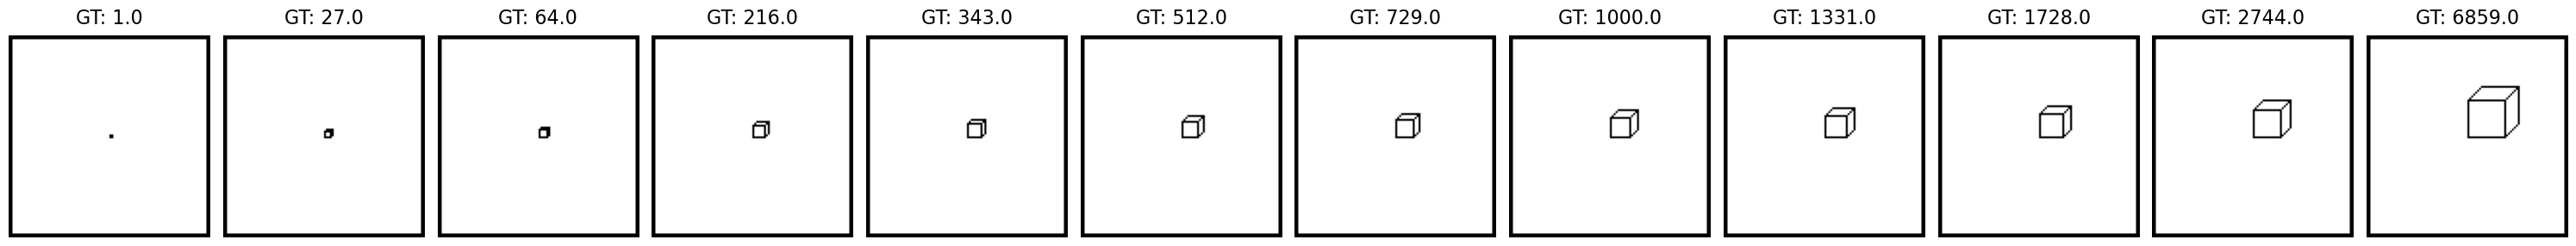

 ground_truth                                                           parsed_answers
          1.0                                                          [1.0, 1.0, 1.0]
         27.0                                           [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
         64.0                                     [64.0, 64.0, 64.0, 64.0, 64.0, 64.0]
        216.0                                     [64.0, 64.0, 64.0, 64.0, 64.0, 64.0]
        343.0                               [378.0, 378.0, 378.0, 378.0, 378.0, 378.0]
        512.0                                                    [512.0, 512.0, 512.0]
        729.0                                                    [512.0, 512.0, 512.0]
       1000.0                                                    [512.0, 729.0, 729.0]
       1331.0          [512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0, 512.0]
       1728.0                                                    [512.0, 512.0, 512.0]
       2744.0 [4913.0, 4913.0, 4913.0, 4913

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os

# Define the parameters
dataset = df_volume  # This should be your actual DataFrame with ground truth and predictions
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results/volume/"  # Adjust the folder path for area dataset

def filter_sort_and_group_df(df, base_folder=''):
    """
    Filters the DataFrame for a specific model, sorts and groups by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.
    """
    # Filter for the specific model "CustomLLaMA" and ground truth range 113 to 804
    df = df[(df['model_name'] == 'CustomLLaMA') & 
            (df['ground_truth'] >= 0) & 
            (df['ground_truth'] <= 9000)]

    # Ensure numeric conversion for sorting
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization of Images in a Row
num_images = len(unique_ground_truth_df)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2.5, 4))  # Create a row layout

for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    image_path = row['image_path']
    ground_truth = row['ground_truth']
    
    if os.path.exists(image_path):
        # Load the image and apply the inverted grayscale and border effect
        img = Image.open(image_path).convert("L")  # Convert to grayscale
        img_inverted = ImageOps.invert(img)  # Invert colors
        img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=2, fill="black")  # Add black border

        # Display the processed image
        axes[i].imshow(img_with_border)
        axes[i].axis('off')  # Turn off axis for each image

        # Display only the ground truth (GT) label as the title with a larger font size
        label = f"GT: {ground_truth:.1f}"
        axes[i].set_title(label, fontsize=16, pad=10, color="black")  # Increase fontsize to 16

    else:
        # If the image file doesn't exist, display a placeholder text
        axes[i].text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=12, color="black")
        axes[i].set_facecolor("white")
        axes[i].axis('off')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Display parsed answers as a table below the images
parsed_answers_table = unique_ground_truth_df[['ground_truth', 'parsed_answers']]
print(parsed_answers_table.to_string(index=False))  # Print the table without the index


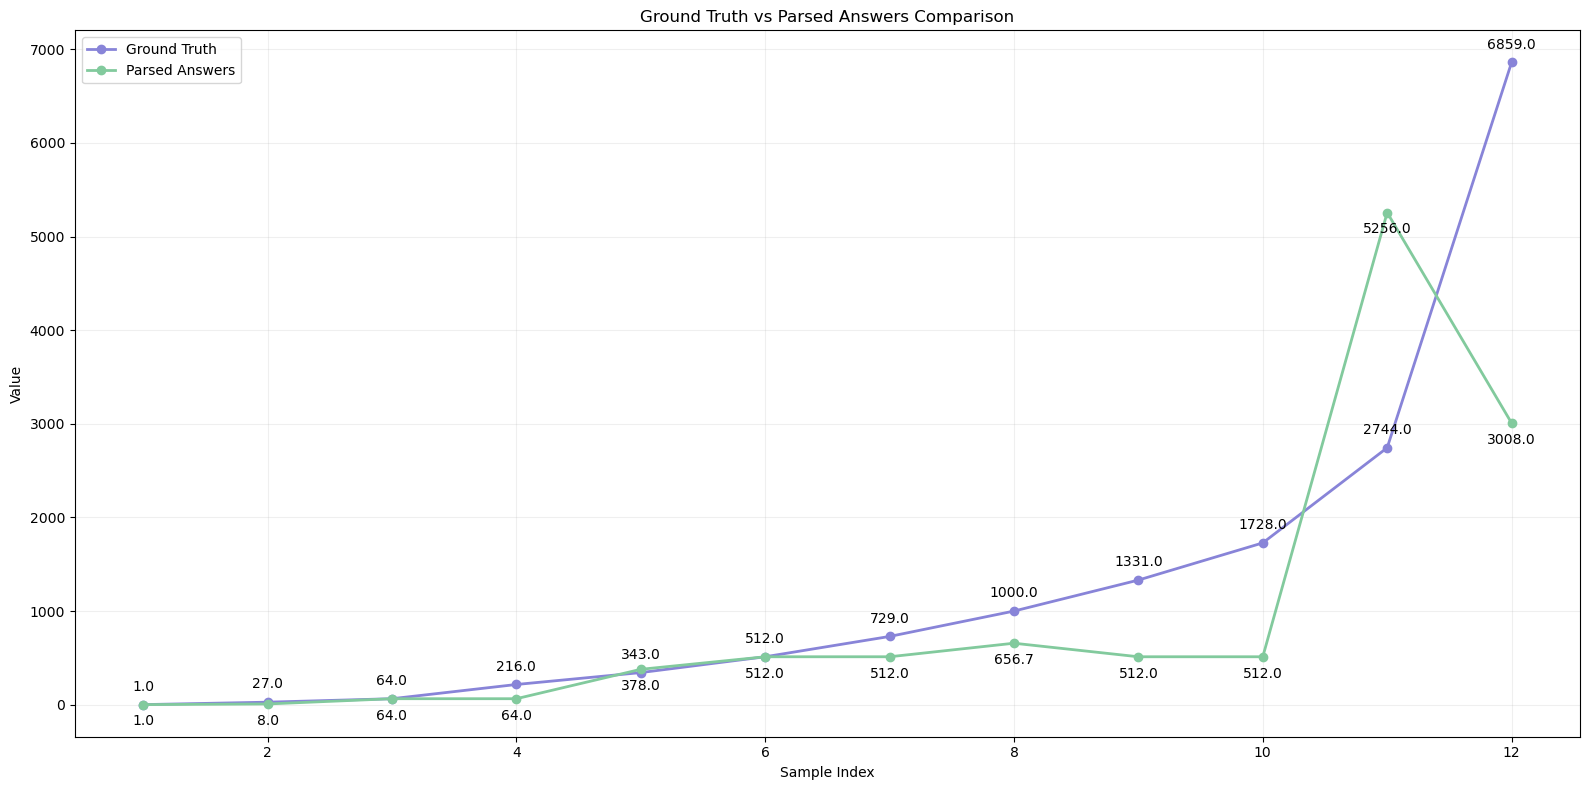

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define base folder path and process data (assuming `dataset` is already defined)
# Note: `filter_sort_and_group_df` function is not necessary here since we don't need images.

# Assuming `unique_ground_truth_df` is already prepared as a DataFrame with 'ground_truth' and 'parsed_answers'
# Extract data for plotting
ground_truth = unique_ground_truth_df['ground_truth'].tolist()
parsed_answers = [np.mean(pa) for pa in unique_ground_truth_df['parsed_answers']]

# Create figure for the line chart only
plt.figure(figsize=(16, 8))

# Plot ground truth and parsed answers
plt.plot(range(1, len(ground_truth) + 1), ground_truth, 'o-', label='Ground Truth', color='#8884d8', linewidth=2, markersize=6)
plt.plot(range(1, len(parsed_answers) + 1), parsed_answers, 'o-', label='Parsed Answers', color='#82ca9d', linewidth=2, markersize=6)

# Customize chart
plt.grid(True, alpha=0.2)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Ground Truth vs Parsed Answers Comparison')
plt.legend()

# Add annotations for each point
for i, (gt, pa) in enumerate(zip(ground_truth, parsed_answers)):
    plt.annotate(f'{gt:.1f}', (i+1, gt), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{pa:.1f}', (i+1, pa), textcoords="offset points", xytext=(0,-15), ha='center')

# Final layout adjustment and display
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (3983793069.py, line 4)

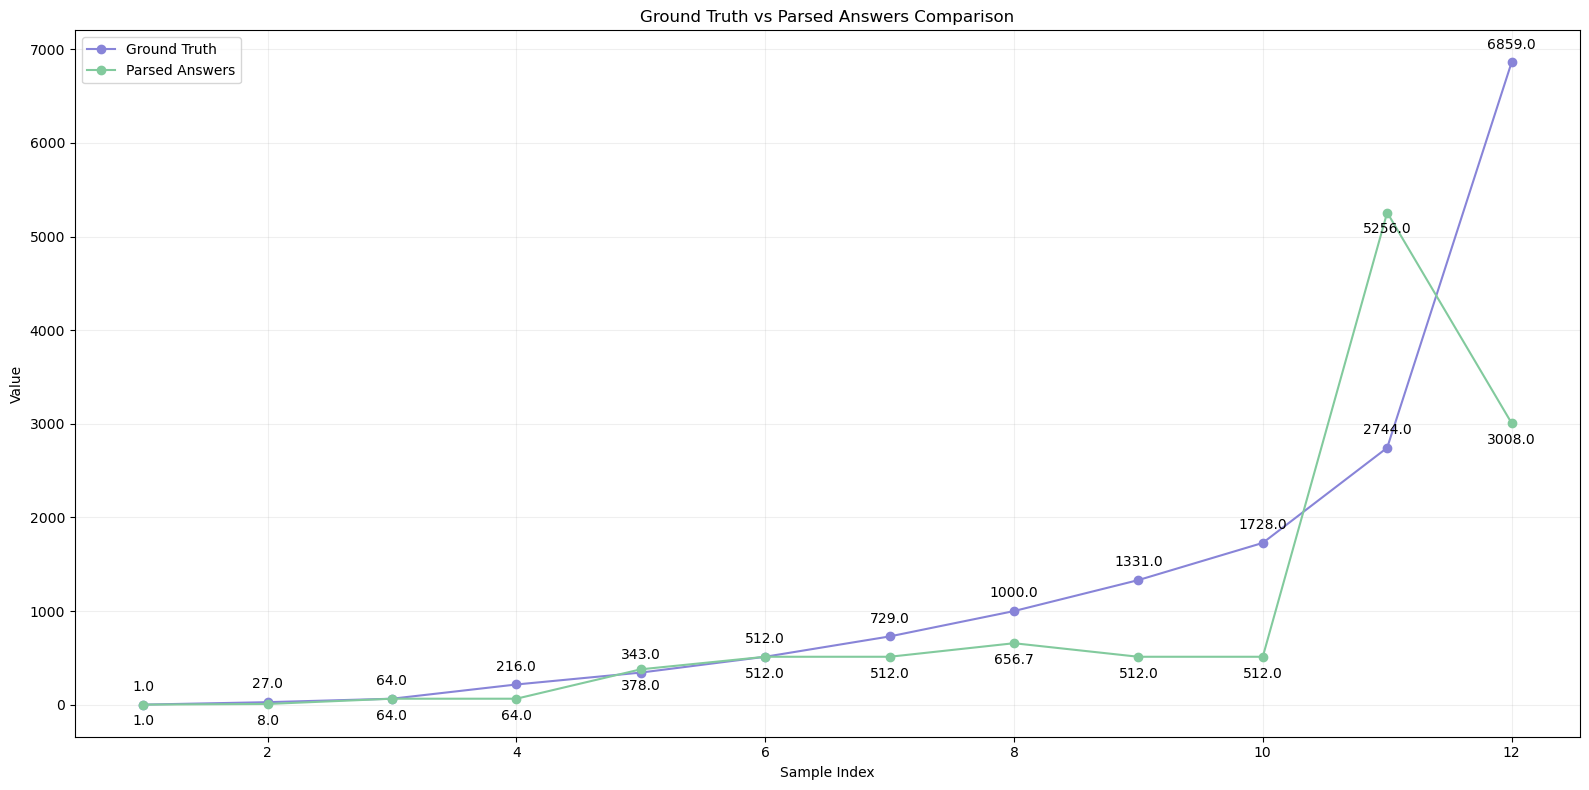

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
ground_truth = [1.0, 27.0, 64.0, 216.0, 343.0, 512.0, 729.0, 1000.0, 1331.0, 1728.0, 2744.0, 6859.0]

# Calculate average of parsed answers for each position
parsed_answers = [
    np.mean([1.0, 1.0, 1.0]),
    np.mean([8.0, 8.0, 8.0, 8.0, 8.0, 8.0]),
    np.mean([64.0, 64.0, 64.0, 64.0, 64.0, 64.0]),
    np.mean([64.0, 64.0, 64.0, 64.0, 64.0, 64.0]),
    np.mean([378.0, 378.0, 378.0, 378.0, 378.0, 378.0]),
    np.mean([512.0, 512.0, 512.0]),
    np.mean([512.0, 512.0, 512.0]),
    np.mean([512.0, 729.0, 729.0]),
    np.mean([512.0] * 9),
    np.mean([512.0, 512.0, 512.0]),
    np.mean([4913.0] * 8 + [8000.0]),
    np.mean([512.0, 512.0, 8000.0])
]

# Create the visualization
plt.figure(figsize=(16, 8))

# Plot both lines
plt.plot(range(1, len(ground_truth) + 1), ground_truth, 'o-', label='Ground Truth', color='#8884d8')
plt.plot(range(1, len(parsed_answers) + 1), parsed_answers, 'o-', label='Parsed Answers', color='#82ca9d')

# Customize the plot
plt.grid(True, alpha=0.2)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Ground Truth vs Parsed Answers Comparison')
plt.legend()

# Add value annotations
for i, (gt, pa) in enumerate(zip(ground_truth, parsed_answers)):
    plt.annotate(f'{gt:.1f}', (i+1, gt), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{pa:.1f}', (i+1, pa), textcoords="offset points", xytext=(0,-15), ha='center')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

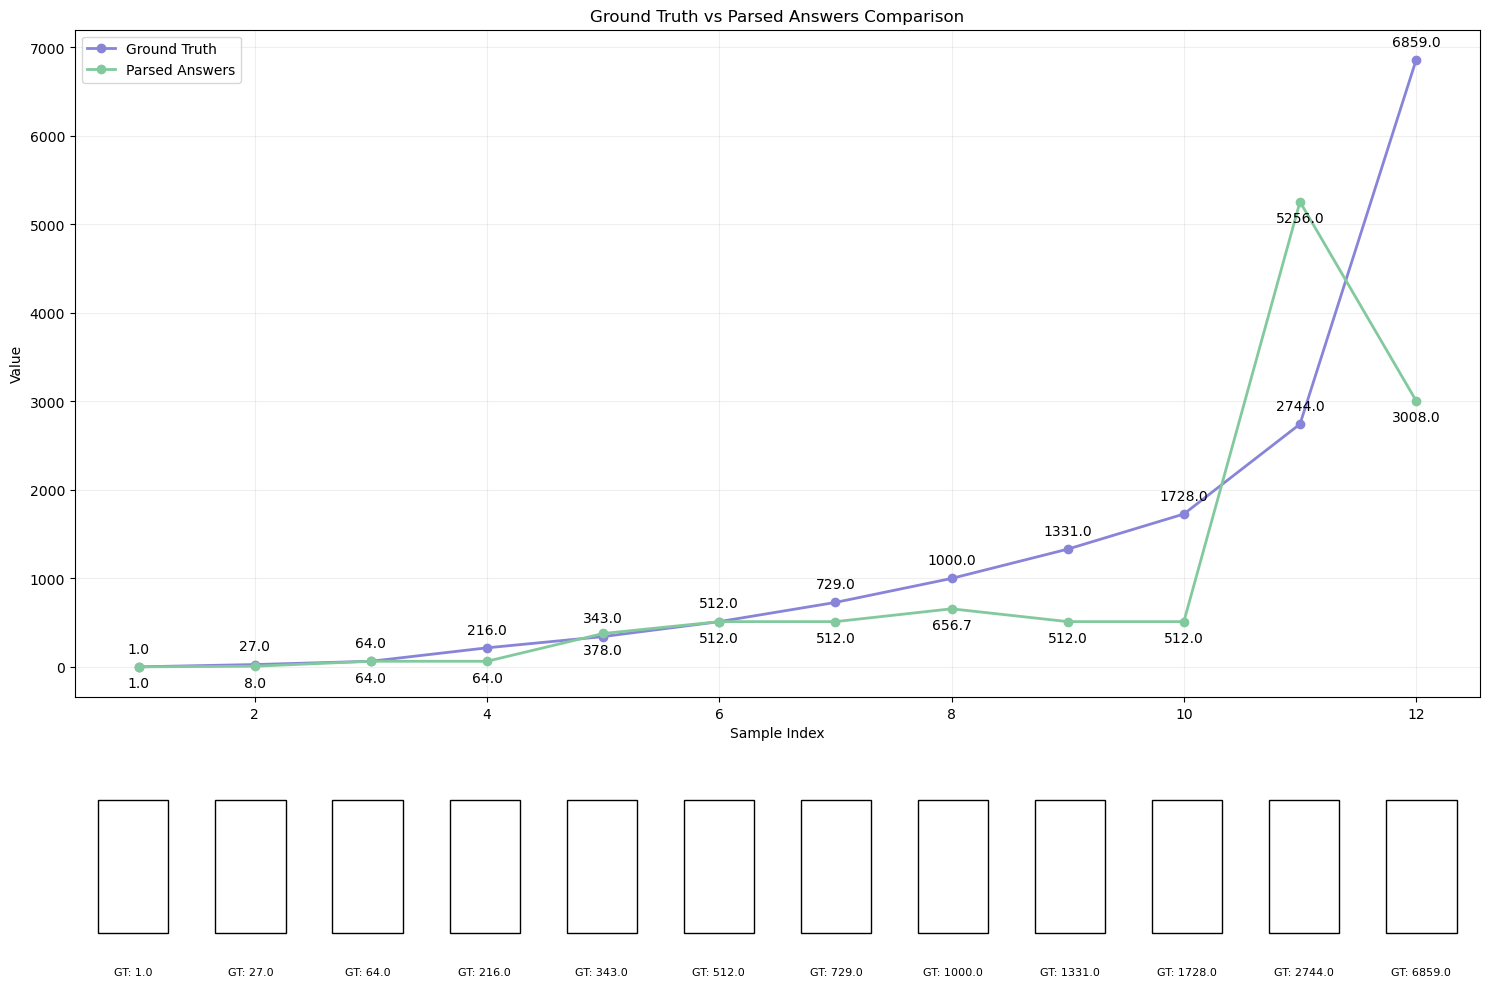

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
ground_truth = [1.0, 27.0, 64.0, 216.0, 343.0, 512.0, 729.0, 1000.0, 1331.0, 1728.0, 2744.0, 6859.0]
parsed_answers = [
    np.mean([1.0, 1.0, 1.0]),
    np.mean([8.0, 8.0, 8.0, 8.0, 8.0, 8.0]),
    np.mean([64.0, 64.0, 64.0, 64.0, 64.0, 64.0]),
    np.mean([64.0, 64.0, 64.0, 64.0, 64.0, 64.0]),
    np.mean([378.0, 378.0, 378.0, 378.0, 378.0, 378.0]),
    np.mean([512.0, 512.0, 512.0]),
    np.mean([512.0, 512.0, 512.0]),
    np.mean([512.0, 729.0, 729.0]),
    np.mean([512.0] * 9),
    np.mean([512.0, 512.0, 512.0]),
    np.mean([4913.0] * 8 + [8000.0]),
    np.mean([512.0, 512.0, 8000.0])
]

# Create figure with specific aspect ratio
plt.figure(figsize=(15, 10))

# Create two subplots with specific height ratios
gs = plt.GridSpec(2, 1, height_ratios=[3, 1])

# Top subplot for the line chart
ax1 = plt.subplot(gs[0])

# Plot lines with markers
ax1.plot(range(1, len(ground_truth) + 1), ground_truth, 'o-', label='Ground Truth', color='#8884d8', linewidth=2, markersize=6)
ax1.plot(range(1, len(parsed_answers) + 1), parsed_answers, 'o-', label='Parsed Answers', color='#82ca9d', linewidth=2, markersize=6)

# Customize chart
ax1.grid(True, alpha=0.2)
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Value')
ax1.set_title('Ground Truth vs Parsed Answers Comparison')
ax1.legend()

# Add value annotations
for i, (gt, pa) in enumerate(zip(ground_truth, parsed_answers)):
    ax1.annotate(f'{gt:.1f}', (i+1, gt), textcoords="offset points", xytext=(0,10), ha='center')
    ax1.annotate(f'{pa:.1f}', (i+1, pa), textcoords="offset points", xytext=(0,-15), ha='center')

# Bottom subplot for image boxes
ax2 = plt.subplot(gs[1])
ax2.set_xlim(-0.5, 11.5)
ax2.set_ylim(-0.5, 0.5)

# Add boxes and GT labels
for i in range(12):
    # Draw box
    rect = plt.Rectangle((i-0.3, -0.3), 0.6, 0.6, fill=False, color='black')
    ax2.add_patch(rect)
    # Add GT label
    ax2.text(i, -0.45, f'GT: {ground_truth[i]}', ha='center', va='top', fontsize=8)

# Remove axes for bottom subplot
ax2.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()